# Washington Bike Demand Prediction 
### 1.1 Introduction
In this machine learning project, the demand for the bikes would be predicted using different machine learning techniques. There are different bike rental companies such as Zagster and City Bikes and there would be a great business value for the companies if they were to predict the demand for bikes for particular instances of time and other features such as temperature and windspeed. Therefore, it would be important to understand the demand for bikes during different instances of time so that companies use this information and make profits and also provide bikes to different people as and when needed respectively. As a result, there would be a good growth in revenue for different bike lending companies with the aid of machine learning and data science. 

In the project, we would be working with the Washington bike demand dataset and understand some of the features present in them. Later, we would add a few additional features so that we get get a good estimate of different parameters that need to be taken into consideration when implementing visualization and different machine learning and deep learning algorithms. Finally, we would plot the graphs of the predictions and the actual values to get an understanding of how well our model performed, not just on the training data but the test data respectively.

### 1.2 Metrics 
1. Mean Squared Error (MSE)
2. Mean Absolute Error (MAE)

### 1.3 Source 
This data was downloaded from Kaggle — a website that gives permissions to users to download large datasets for machine learning purposes. Below is a link to the website where data is available. 

https://www.kaggle.com/marklvl/bike-sharing-dataset?search=bike+demand+Washington

### Table of Contents 
### 1. Washington Bike Demand Prediction
&emsp;1.1 Introduction

&emsp; 1.2 Metrics

&emsp; 1.3 Source
### 2. Exploratory Data Analysis 
##### &ensp; 2.1 Different Season Plots

&emsp;&ensp;&ensp;2.1.1 Countplot for Different Seasons

&emsp;&ensp;&ensp;2.1.2 Plot for Average Demand for Bikes during Different Seasons

&emsp;&ensp;&ensp;2.1.3 Total Demand for Bikes for Different Seasons

##### &ensp; 2.2 Different Month Plots

&emsp;&ensp;&ensp;2.2.1 Countplot of Different Months

&emsp;&ensp;&ensp;2.2.2 Average Demand for Bikes for Different Months

2.3 Distribution of Windspeed

2.4 Distribution of Temperature Values

2.5 Total Demand for Bikes during Different Hours

2.6 Distribution of Humidity values
##### 2.7 Scatterplots 
&emsp;&ensp;&ensp;2.7.1 Scatterplot between Demand and Registered Users

&emsp;&ensp;&ensp;2.7.2 Distribution Plot of Casual Riders

&emsp;&ensp;&ensp;2.7.3 Scatterplot between Casual and Registered

2.8 Temperature Segments Countplot

2.9 Average of Temperature Segments

2.9(a) Lineplot for Temperature for Different Months

2.9(b) Scatterplot between Total Demand and Casual Drivers

2.9(c) Average Demand for Bikes for Different Days of the Week

### 3. Machine Learning Analysis
&ensp; 3.1 Deep Neural Network

&ensp; 3.2 K Nearest Neighbors 

&ensp; 3.3 PLS Regression 

&ensp; 3.4 Decision Tree Regressor

&ensp; 3.5 Gradient Boosting Regressor 

&ensp; 3.6 Logistic Regression

### 4. Conclusion
___________________________________________________________________________________________________

#### Importing Libraries






In [1]:
import sys
import pprint
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings("ignore")

In [2]:
# !pip install seaborn
# !pip install --upgrade pip

We would be reading the data that is present in hour.csv file. 

In [3]:
df = pd.read_csv('hour.csv')

Exploring the head of the dataframe just to see some columns that we would be working with and the values present in them. 

In [4]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


It is important to explore the shape of the data to understand the rows and columns present in the data. 

In [5]:
df.shape

(17379, 17)

It would be better to understand the data and check how the values are spread out by understanding the quartiles and the minimum value and maximum value respectively. Below, we would be looking at different numerical features and see how the features are spread. 

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


We would check the null and non-null values just to ensure that we get a good understanding of the data along with their data types.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
# We are trying to access the days in the date column as can be seen below. We would store it in day column 
df['day']= df['dteday'].apply(lambda x: x[8:])

In [10]:
df['day']

0        01
1        01
2        01
3        01
4        01
         ..
17374    31
17375    31
17376    31
17377    31
17378    31
Name: day, Length: 17379, dtype: object

In [11]:
df['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [12]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,01
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,01
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,01
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,01
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,01


Looking at the different unique seasons to understand the data. 

In [13]:
print("The different unique numerical values present in Season feature are: {}".format(df['season'].unique()))

The different unique numerical values present in Season feature are: [1 2 3 4]


In [14]:
season_dict = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

In [15]:
season_dict

{1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

In [16]:
df['Season_cat'] = df['season'].map(season_dict)

In [18]:
df['Season_cat']

0        Spring
1        Spring
2        Spring
3        Spring
4        Spring
          ...  
17374    Spring
17375    Spring
17376    Spring
17377    Spring
17378    Spring
Name: Season_cat, Length: 17379, dtype: object

In [19]:
df['Season_cat'].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

# 2.1 Different Season Plots 

In this section, we are going to be visualizing the bike demand for different seasons. We are also going to take into account the total data points for different seasons and count them to get a broader understanding. Getting a good understanding of the demand for bikes in different seasons can be important as this feature is quite related to the demand for different bikes. This could also be observed in real-life where we see a lot of people driving bikes during one or more seasons compared to the other. Therefore, taking this feature into consideration would give us a good understanding of the importance of this feature and how influential it would be for our machine learning predictions respectively. 

## 2.1.1 Countplot of Different Seasons 
We see below the count of different seasons and can understand that there are slightly more fall season values compared to the other seasons. That is because of the variation in the number of days present every month. Therefore, we can get a good idea about the demand of bikes based on the seasonal data respectively.

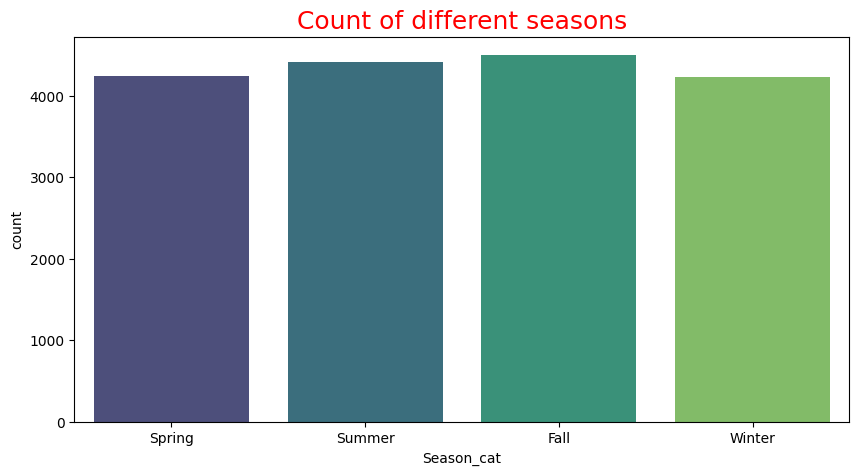

In [24]:
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x = 'Season_cat', palette = 'viridis', saturation = 0.65)
plt.title("Count of different seasons", color = 'red', fontsize = 18)
plt.show()

In [25]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,Season_cat
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,01,Spring
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,01,Spring
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,01,Spring
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,01,Spring
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,01,Spring


## 2.1.2 Plot for Average Demand for Bikes during Different Seasons

We can infer from the below that there is a good demand for bikes in the fall season compared to the other seasons. It is also observed that spring season has the least demand for bikes.

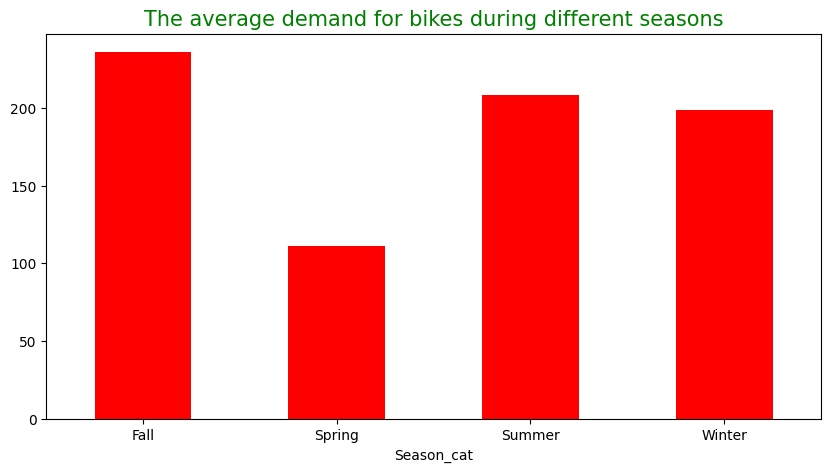

In [29]:
plt.figure(figsize = (10, 5))
df.groupby(['Season_cat'])['cnt'].mean().plot(kind = 'bar', color = 'green')
plt.xticks(rotation = 0)
plt.title("The average demand for bikes during different seasons", fontsize = 15, color = 'red')
plt.show()

## 2.1.3 Total Demand for Bikes for Different Seasons

From the below values, we can see that the fall has the highest demand for the bikes. On the contrary, we also can see that spring has the lowest values for the demand for bikes. We can therefore infer that there would be a good demand for bikes during the fall season and quite a low demand for bikes during the spring season respectively.

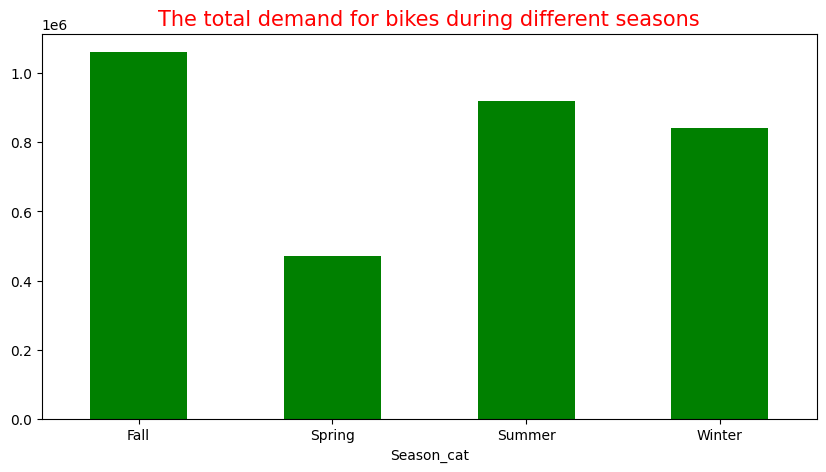

In [31]:
plt.figure(figsize = (10, 5))
df.groupby(['Season_cat'])['cnt'].sum().plot(kind = 'bar', color = 'green')
plt.xticks(rotation = 0)
plt.title("The total demand for bikes during different seasons", fontsize = 15, color = 'red')
plt.show()

In [32]:
month_dict = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July",
             8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
df["Month_cat"] = df['mnth'].map(month_dict)

In [33]:
df["Month_cat"]

0         January
1         January
2         January
3         January
4         January
           ...   
17374    December
17375    December
17376    December
17377    December
17378    December
Name: Month_cat, Length: 17379, dtype: object

# 2.2 Different Month Plots

Now it is time to increase the granularity and understand how different months influence the demand for bikes. In general, we see that when there is snow in cities or rainfall, we don't generally expect a lot of bikes let alone bikes from lending companies. Hence, considering the different months at which there is demand for bikes would also give us a good understanding of the importance of this feature in our machine learning analysis respectively. 

## 2.2.1 Countplot of Different Months

We can see the graph below which shows the total values present for different months respectively. As a result, we can tell that there are some months that have less days and therefore, their values are bit lower than those months which has more days. 

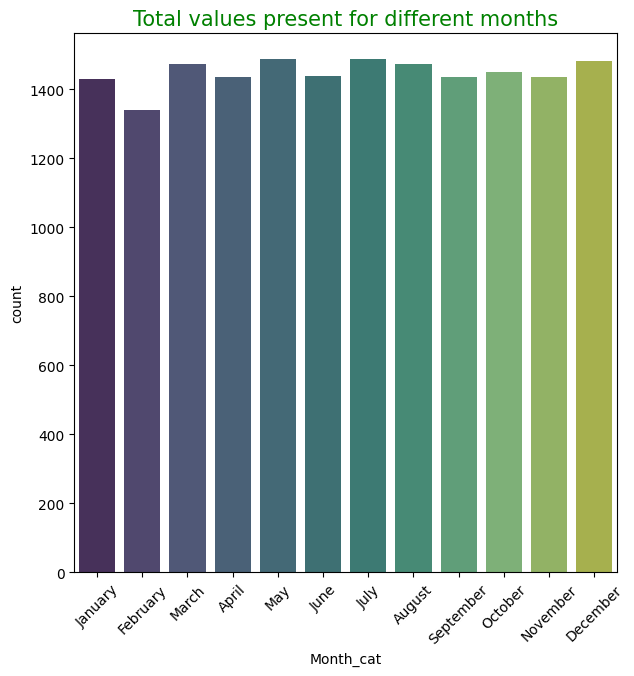

In [34]:
plt.figure(figsize = (7, 7))
plt.xticks(rotation = 45)
sns.countplot(data = df, x = 'Month_cat', palette = 'viridis', saturation = 0.5) 
plt.title("Total values present for different months", fontsize = 15, color = 'green')
plt.show()


## 2.2.2 Average Demand for Bikes for Different Months

There is highest demand for bikes during the month September, June and August respectively. We see that there are other months that have quite a low demand compared to the others. We also see that January has the lowest average demand for the bikes. Therefore, actions must be taken during September as there would be quite a high demand for bikes respectively. In the month of January, however, we see that there is a low demand for bikes. Hence, those bikes can be put in a different location to ensure that people receive the bikes as and when required. 

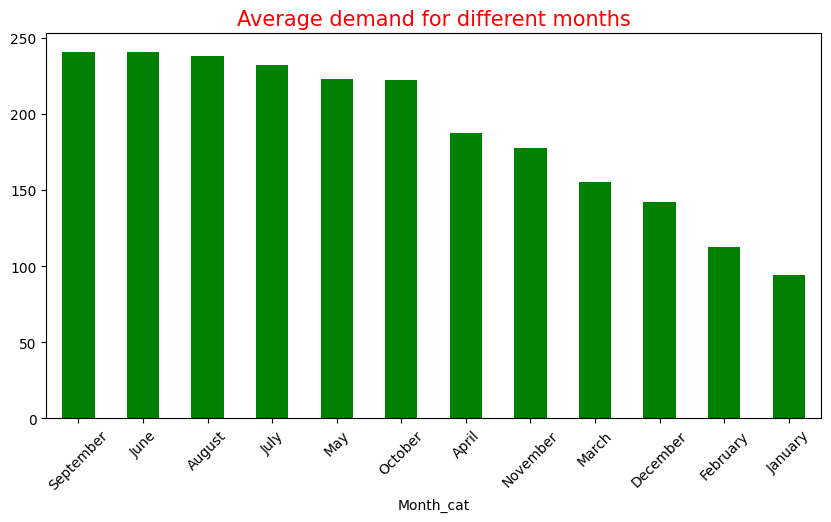

In [37]:
plt.figure(figsize = (10, 5))
df.groupby(['Month_cat'])['cnt'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'green')
plt.xticks(rotation = 45)
plt.title("Average demand for different months", fontsize = 15, color = 'red')
plt.show()

## 2.3 Distribution of Windspeed 

Taking a look at the distribution of the values, we see that most of the values that we are working with in terms of windspeed are with lower speeds. There are quite a few extreme values that are present. Therefore, most of the values that we are dealing in the dataset have values of windspeed that are not quite high respectively.

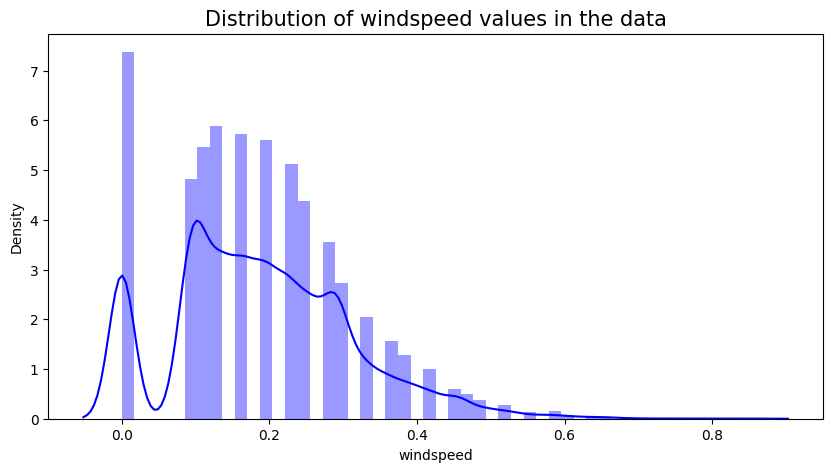

In [39]:
plt.figure(figsize = (10, 5))
sns.distplot(df['windspeed'], color = 'blue')
plt.title("Distribution of windspeed values in the data", fontsize = 15, color = 'black')
plt.show()

## 2.4 Distribution of Temperature Values 

As can be seen, the temperature values are quite evenly distributed. Therefore, we are working with the temperature values that are quite evenly distributed. This would ensure that we get the demand for different temperature values respectively. 

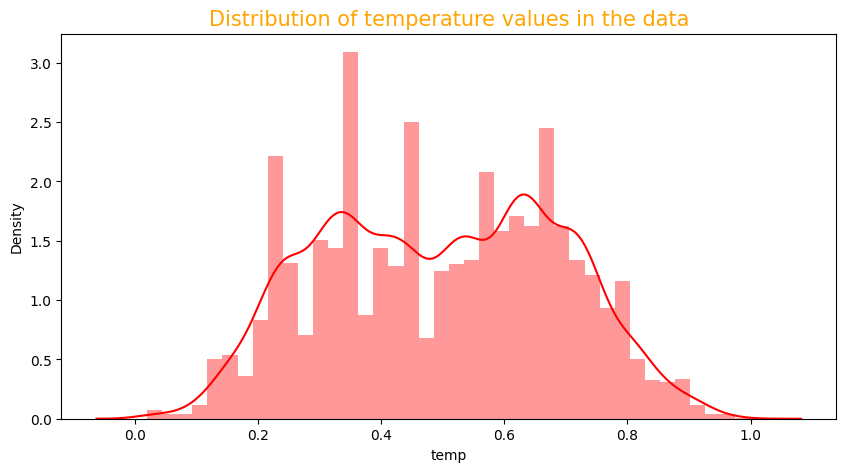

In [40]:
plt.figure(figsize = (10, 5))
sns.distplot(df['temp'], color = 'red')
plt.title("Distribution of temperature values in the data", fontsize = 15, color = 'orange')
plt.show()

In [41]:
def temperature_converter(value):
    temp_max = df['temp'].max()
    temp_min = df['temp'].min()
    return (value * (temp_max - temp_min) + temp_min)

In [42]:
df['Temperature_converted'] = df['temp'].apply(temperature_converter)

In [43]:
df['Temperature_converted']

0        0.2552
1        0.2356
2        0.2356
3        0.2552
4        0.2552
          ...  
17374    0.2748
17375    0.2748
17376    0.2748
17377    0.2748
17378    0.2748
Name: Temperature_converted, Length: 17379, dtype: float64

## 2.5 Total Demand for Bikes during Different Hours

We see that the the total demand for bikes is highest at 5 pm Washington time. As can be seen, there is quite a low demand for bikes early in the morning starting from 1 am to 7 am respectively. In addition to this, we can also see that there is a high demand for bikes starting from 8 am and the demand keeps increasing respectively. 

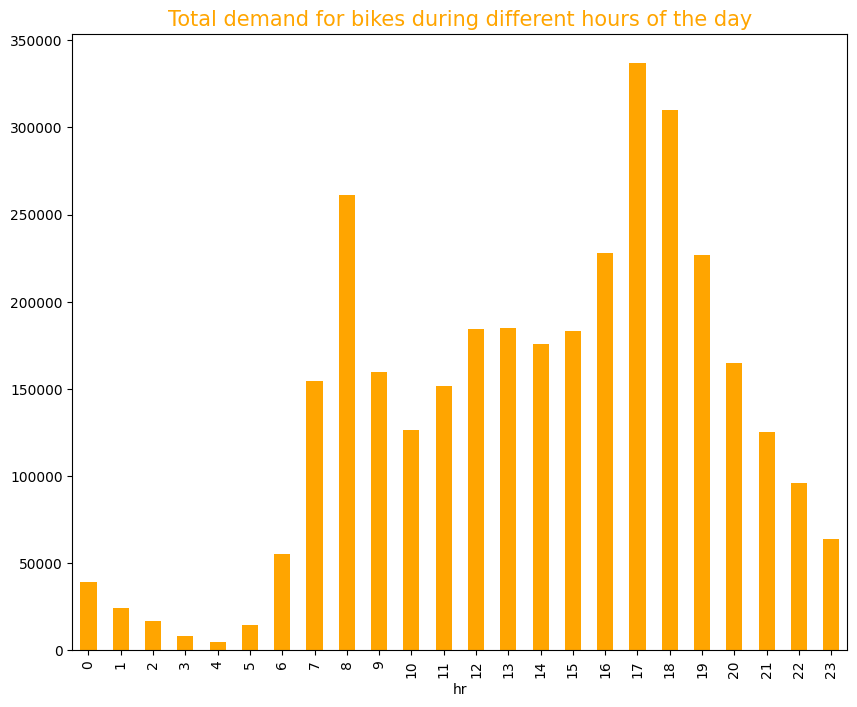

In [44]:
plt.figure(figsize = (10, 8))
df.groupby(['hr'])['cnt'].sum().plot(kind = 'bar', color = 'orange')
plt.title("Total demand for bikes during different hours of the day", fontsize = 15, color = 'orange')
plt.show()

## 2.6 Distribution of Humidity values 

We can see that there is a good distribution of humidity values present and they are quite evenly distributed respectively. There is quite a bit of a left shift in the data. 

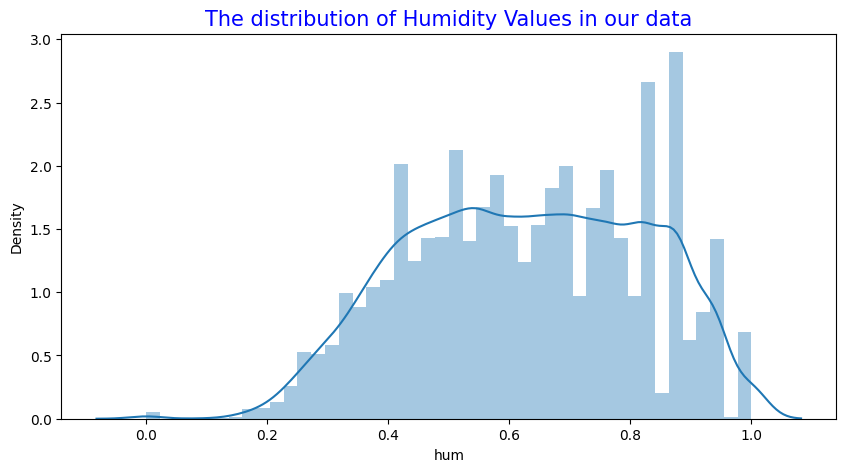

In [45]:
plt.figure(figsize = (10, 5))
sns.distplot(df['hum'])
plt.title("The distribution of Humidity Values in our data", fontsize = 15, color = 'blue')
plt.show()

# 2.7 Scatterplots

Using scatterplots when doing the exploratory data analysis would give us a good understanding of the dependency of different features that we are considering when plotting the graphs. A scatterplot gives a plot based on different data points that takes into account 2 features. If we see that there is a linearity in the data and the points that are marked by the scatterplot, it could be concluded that those features are dependent on each other or strongly correlated. On the other hand, if there is a negative spread of the data points when plotted on the scatterplot, this would mean that there is a negative correlation or inverse dependency. 

## 2.7.1 Scatterplot between Demand and Registered Users

As can be seen, as the number of people registered increases, there is a very good possibility for the demand for bikes to increase respectively. When the number of registered users are low, we see that the total demand of bikes is due to casual riders. One can infer from this data that as the number of registered users and registered bikes increases, there is a possibility that the demand created is mainly due to registered users. If the registered users are low, we see that the demand is created not just by the registered users but also by casual riders respectively.

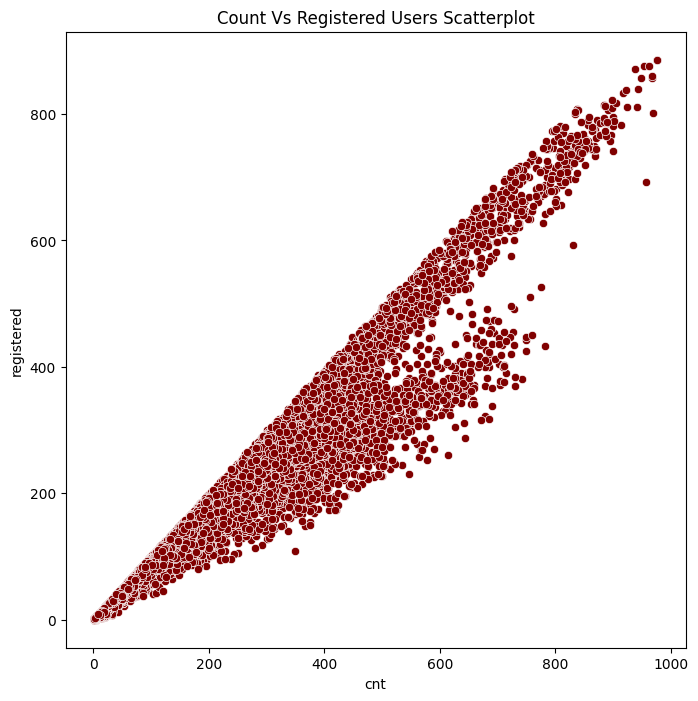

In [46]:
plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'cnt', y = 'registered', data = df, color = 'maroon', marker = 'o')
plt.title('Count Vs Registered Users Scatterplot')
plt.show()

In [47]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,day,Season_cat,Month_cat,Temperature_converted
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,01,Spring,January,0.2552
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,01,Spring,January,0.2356
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,01,Spring,January,0.2356
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,01,Spring,January,0.2552
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,01,Spring,January,0.2552


## 2.7.2 Distribution Plot of Casual Riders

Looking at the distribution plot, there are very few instances where the riders are like around 400 while there is a higher incidence of casual riders who are about 50. There is a right tailed distribution where very few values are concentrated towards the right while there is a dense distribution towards the left side of the plot as can be seen below. It can be inferred from the below graph that there are very few instances of casual riders who are more than 50 while a higher incidence of casual riders who are less than 50 respectively. 

<Axes: xlabel='casual', ylabel='Density'>

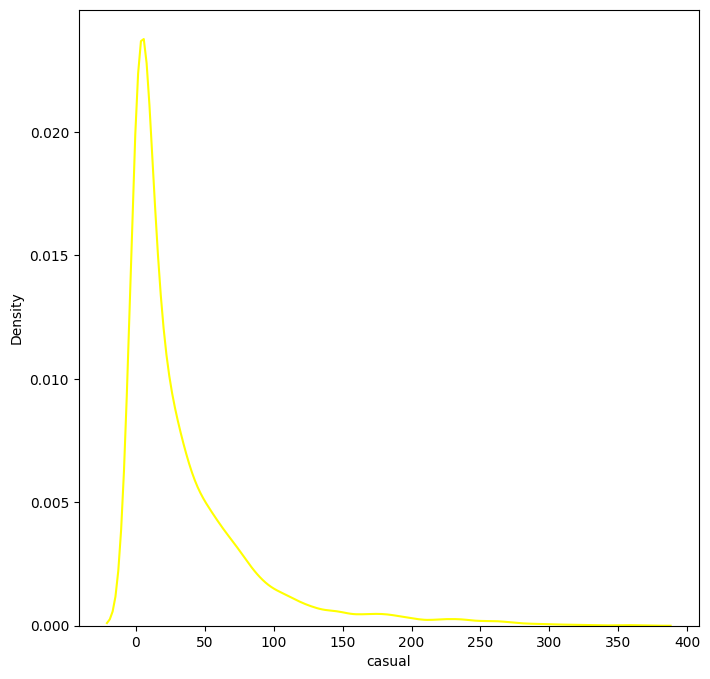

In [48]:
plt.figure(figsize = (8, 8))
sns.kdeplot(df['casual'], color = 'yellow')

## 2.7.3 Scatterplot between Casual and Registered

As can be seen below, there seems to be a linear relationship between casual riders and registered riders. This might not hold true in all the cases. There can be instances where the number of casual riders are more than the number of registered riders and vice-versa. 

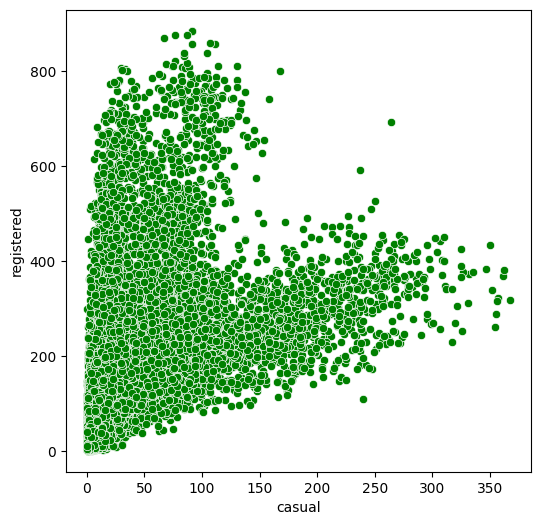

In [49]:
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'casual', y = 'registered', color = 'green', data = df)
plt.show()

Let us now look at all the columns that we would be working with and get an understanding of the data. 

In [50]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'day', 'Season_cat', 'Month_cat',
       'Temperature_converted'],
      dtype='object')

In [51]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,day,Season_cat,Month_cat,Temperature_converted
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,01,Spring,January,0.2552
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,01,Spring,January,0.2356
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,01,Spring,January,0.2356
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,01,Spring,January,0.2552
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,01,Spring,January,0.2552


In [60]:
def temperature_segments(value):
    if value < 0.2:
        return 0.1
    elif value < 0.4 and value > 0.2:
        return 0.3
    elif value < 0.6 and value > 0.4:
        return 0.5
    elif value < 0.7 and value > 0.5:
        return 0.6
    elif value < 0.8 and value > 0.6:
        return 0.7
    elif value < 0.9 and value > 0.7:
        return 0.8
    else:
        return 0.9

We would be working with the temperature segments and divide the temperature values respectively.

In [61]:
df['Temperature_segments'] = df['temp'].apply(temperature_segments)
df['Temperature_segments'].unique()

array([0.3, 0.9, 0.5, 0.1, 0.6, 0.7, 0.8])

## 2.8 Temperature Segments Countplot

There can be extremely high values or extremely low values of temperature in our data. As can be seen, looks like there are very few points that have a very high temperature or a very low temperature respectively. 

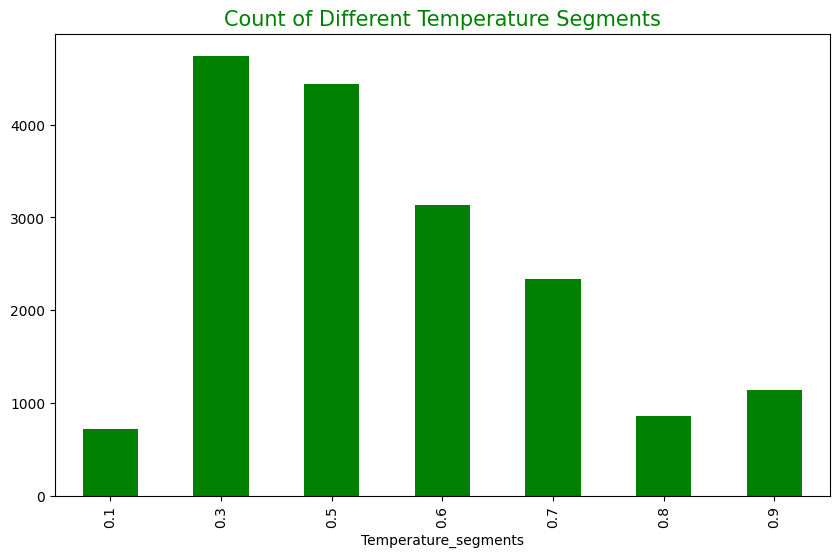

In [64]:
plt.figure(figsize = (10, 6))
df.groupby(['Temperature_segments'])['cnt'].count().plot(kind = 'bar', color = 'green')
# sns.countplot(df['Temperature_segments'], palette = 'viridis')
plt.title("Count of Different Temperature Segments", fontsize = 15, color = 'green')
plt.show()

## 2.9 Average of Temperature Segments

It is now time to see how the demand for bikes is influenced by temperature. As can be seen from the plot below, there is a good average demand for bikes for the temperature segment 0.8 compared to the other segments that we have just created. This could give us a good inference that as the temperature values keep increasing, there is a possibility for the demand for the bikes to increase. However, there is a caveat here where if the temperature is too hot, then people would not be inclined to drive the bikes. Therefore, this gave us a good understanding of how temperature could be one of the deciding factors which could be used for predicting the bike demand. 

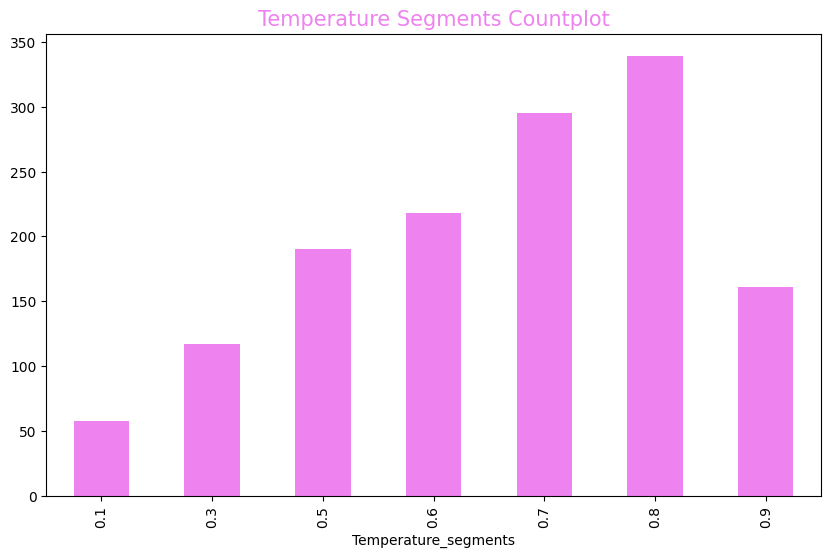

In [65]:
plt.figure(figsize = (10, 6))
df.groupby(['Temperature_segments'])['cnt'].mean().plot(kind = 'bar', color = 'violet')
plt.title("Temperature Segments Countplot", fontsize = 15, color = 'violet')
plt.show()

In [66]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,day,Season_cat,Month_cat,Temperature_converted,Temperature_segments
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.81,0.0,3,13,16,01,Spring,January,0.2552,0.3
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.80,0.0,8,32,40,01,Spring,January,0.2356,0.3
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.80,0.0,5,27,32,01,Spring,January,0.2356,0.3
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.75,0.0,3,10,13,01,Spring,January,0.2552,0.3
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.75,0.0,0,1,1,01,Spring,January,0.2552,0.3


## 2.9(a) Lineplot for Temperature for Different Months

We see from the figure below that the temperature on average is higher in the month of July and it is quite low in the month of February as it is the spring season during that time. As a result, we get different average temperatures for different months and we are going to be using this understanding and see how the demand for bikes would change based on the values respectively. 

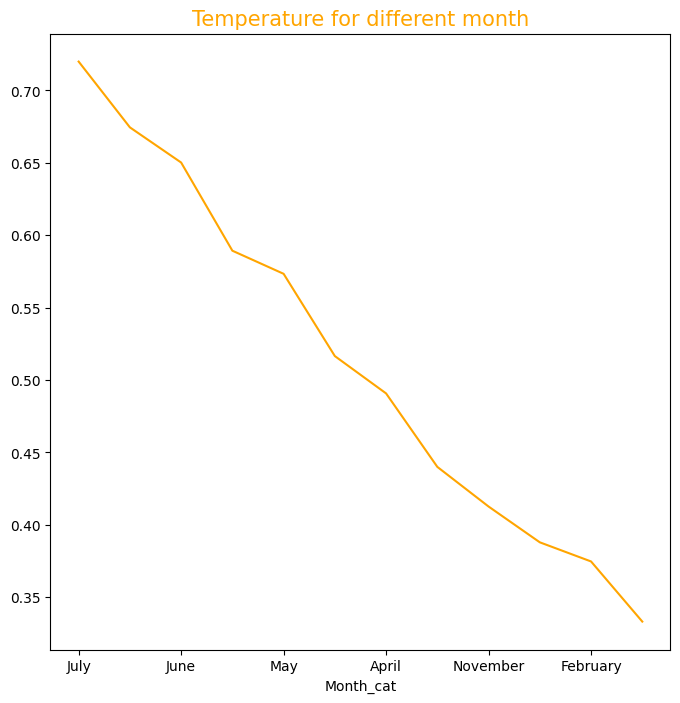

In [68]:
plt.figure(figsize = (8, 8))
df.groupby(['Month_cat'])['Temperature_segments'].mean().sort_values(ascending = False).plot(kind = 'line', color = 'orange')
plt.title("Temperature for different month", color = 'orange', fontsize = 15)
plt.show()

## 2.9(b) Scatterplot between Total Demand and Casual Drivers

As can be seen below, there is a linear relationship between the total number of casual drivers and the demand for the bikes respectively. There seems to a linear trend between the number of casual drivers and the total demand for the bikes. 

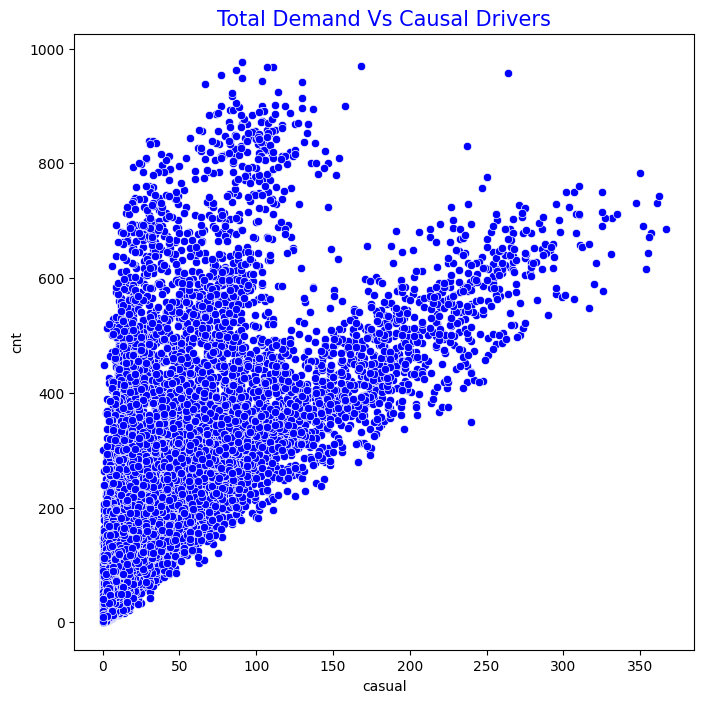

In [69]:
plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'casual', y = 'cnt', data = df, color = 'blue')
plt.title("Total Demand Vs Causal Drivers", fontsize = 15, color = 'blue')
plt.show()

## 2.9(c) Average Demand for Bikes for Different Days of the Week

As can be seen below, there seems to be not much of a difference between different days of the week as the values of the average demand for bikes is almost the same with slight differences. We cannot easily distinguish the differences and therefore, this feature might not be that useful in helping us in predicting the total demand for bikes respectively.

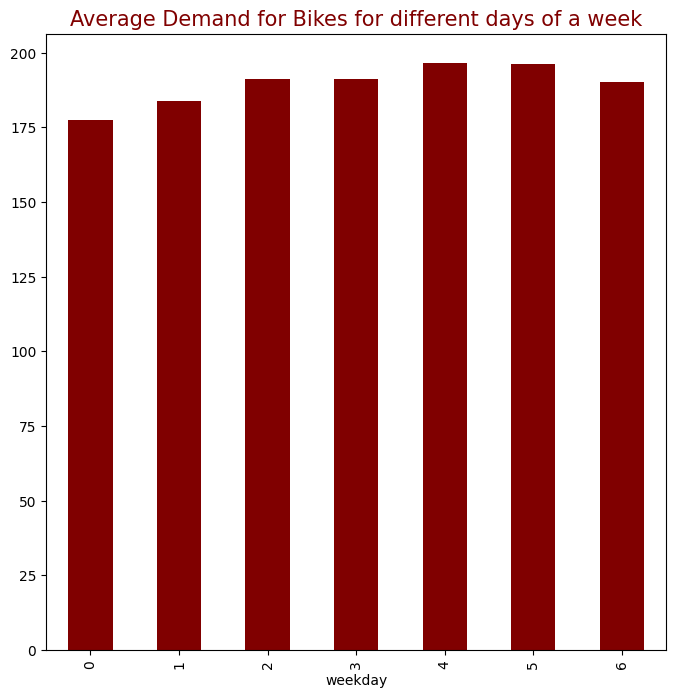

In [71]:
plt.figure(figsize = (8, 8))
df.groupby(['weekday'])['cnt'].mean().plot(kind = 'bar', color = 'maroon')
plt.title("Average Demand for Bikes for different days of a week", fontsize = 15, color  = 'maroon')
plt.show()

We are going to once again look at the data values along with their data types. 

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   instant                17379 non-null  int64  
 1   dteday                 17379 non-null  object 
 2   season                 17379 non-null  int64  
 3   yr                     17379 non-null  int64  
 4   mnth                   17379 non-null  int64  
 5   hr                     17379 non-null  int64  
 6   holiday                17379 non-null  int64  
 7   weekday                17379 non-null  int64  
 8   workingday             17379 non-null  int64  
 9   weathersit             17379 non-null  int64  
 10  temp                   17379 non-null  float64
 11  atemp                  17379 non-null  float64
 12  hum                    17379 non-null  float64
 13  windspeed              17379 non-null  float64
 14  casual                 17379 non-null  int64  
 15  re

In [73]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,day,Season_cat,Month_cat,Temperature_converted,Temperature_segments
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.81,0.0,3,13,16,01,Spring,January,0.2552,0.3
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.80,0.0,8,32,40,01,Spring,January,0.2356,0.3
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.80,0.0,5,27,32,01,Spring,January,0.2356,0.3
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.75,0.0,3,10,13,01,Spring,January,0.2552,0.3
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.75,0.0,0,1,1,01,Spring,January,0.2552,0.3


We are going to be dropping the season categorical variable and the month categorical variable as those variables are objects rather than integers or floats. Here, drop is being used to remove the columns with the names. 

In [74]:
df.drop(['Season_cat', 'Month_cat'], axis = 1, inplace = True)

In [75]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,Temperature_converted,Temperature_segments
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,01,0.2552,0.3
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,01,0.2356,0.3
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,01,0.2356,0.3
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,01,0.2552,0.3
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,01,0.2552,0.3


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   instant                17379 non-null  int64  
 1   dteday                 17379 non-null  object 
 2   season                 17379 non-null  int64  
 3   yr                     17379 non-null  int64  
 4   mnth                   17379 non-null  int64  
 5   hr                     17379 non-null  int64  
 6   holiday                17379 non-null  int64  
 7   weekday                17379 non-null  int64  
 8   workingday             17379 non-null  int64  
 9   weathersit             17379 non-null  int64  
 10  temp                   17379 non-null  float64
 11  atemp                  17379 non-null  float64
 12  hum                    17379 non-null  float64
 13  windspeed              17379 non-null  float64
 14  casual                 17379 non-null  int64  
 15  re

In [77]:
df['day'] = df['day'].apply(lambda x: int(x))

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   instant                17379 non-null  int64  
 1   dteday                 17379 non-null  object 
 2   season                 17379 non-null  int64  
 3   yr                     17379 non-null  int64  
 4   mnth                   17379 non-null  int64  
 5   hr                     17379 non-null  int64  
 6   holiday                17379 non-null  int64  
 7   weekday                17379 non-null  int64  
 8   workingday             17379 non-null  int64  
 9   weathersit             17379 non-null  int64  
 10  temp                   17379 non-null  float64
 11  atemp                  17379 non-null  float64
 12  hum                    17379 non-null  float64
 13  windspeed              17379 non-null  float64
 14  casual                 17379 non-null  int64  
 15  re

In [79]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,Temperature_converted,Temperature_segments
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,0.2552,0.3
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,0.2356,0.3
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,0.2356,0.3
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,0.2552,0.3
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,0.2552,0.3


It is really important to remove the casual and registered users features from our data as these would surely give the output and the machine learning model would consider these as important features and ignore the remaining.

In [80]:
df.drop(['casual', 'registered'], axis = 1, inplace = True)

In [81]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,Temperature_converted,Temperature_segments
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,1,0.2552,0.3
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,1,0.2356,0.3
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,1,0.2356,0.3
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,1,0.2552,0.3
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1,0.2552,0.3


In [82]:
from datetime import datetime

In [83]:
df['dteday'] = df['dteday'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [84]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,Temperature_converted,Temperature_segments
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,1,0.2552,0.3
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,1,0.2356,0.3
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,1,0.2356,0.3
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,1,0.2552,0.3
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1,0.2552,0.3


In [85]:
univariate_data_df = df['cnt']
univariate_data_df.index = df['dteday']
univariate_data_df.head()

dteday
2011-01-01    16
2011-01-01    40
2011-01-01    32
2011-01-01    13
2011-01-01     1
Name: cnt, dtype: int64

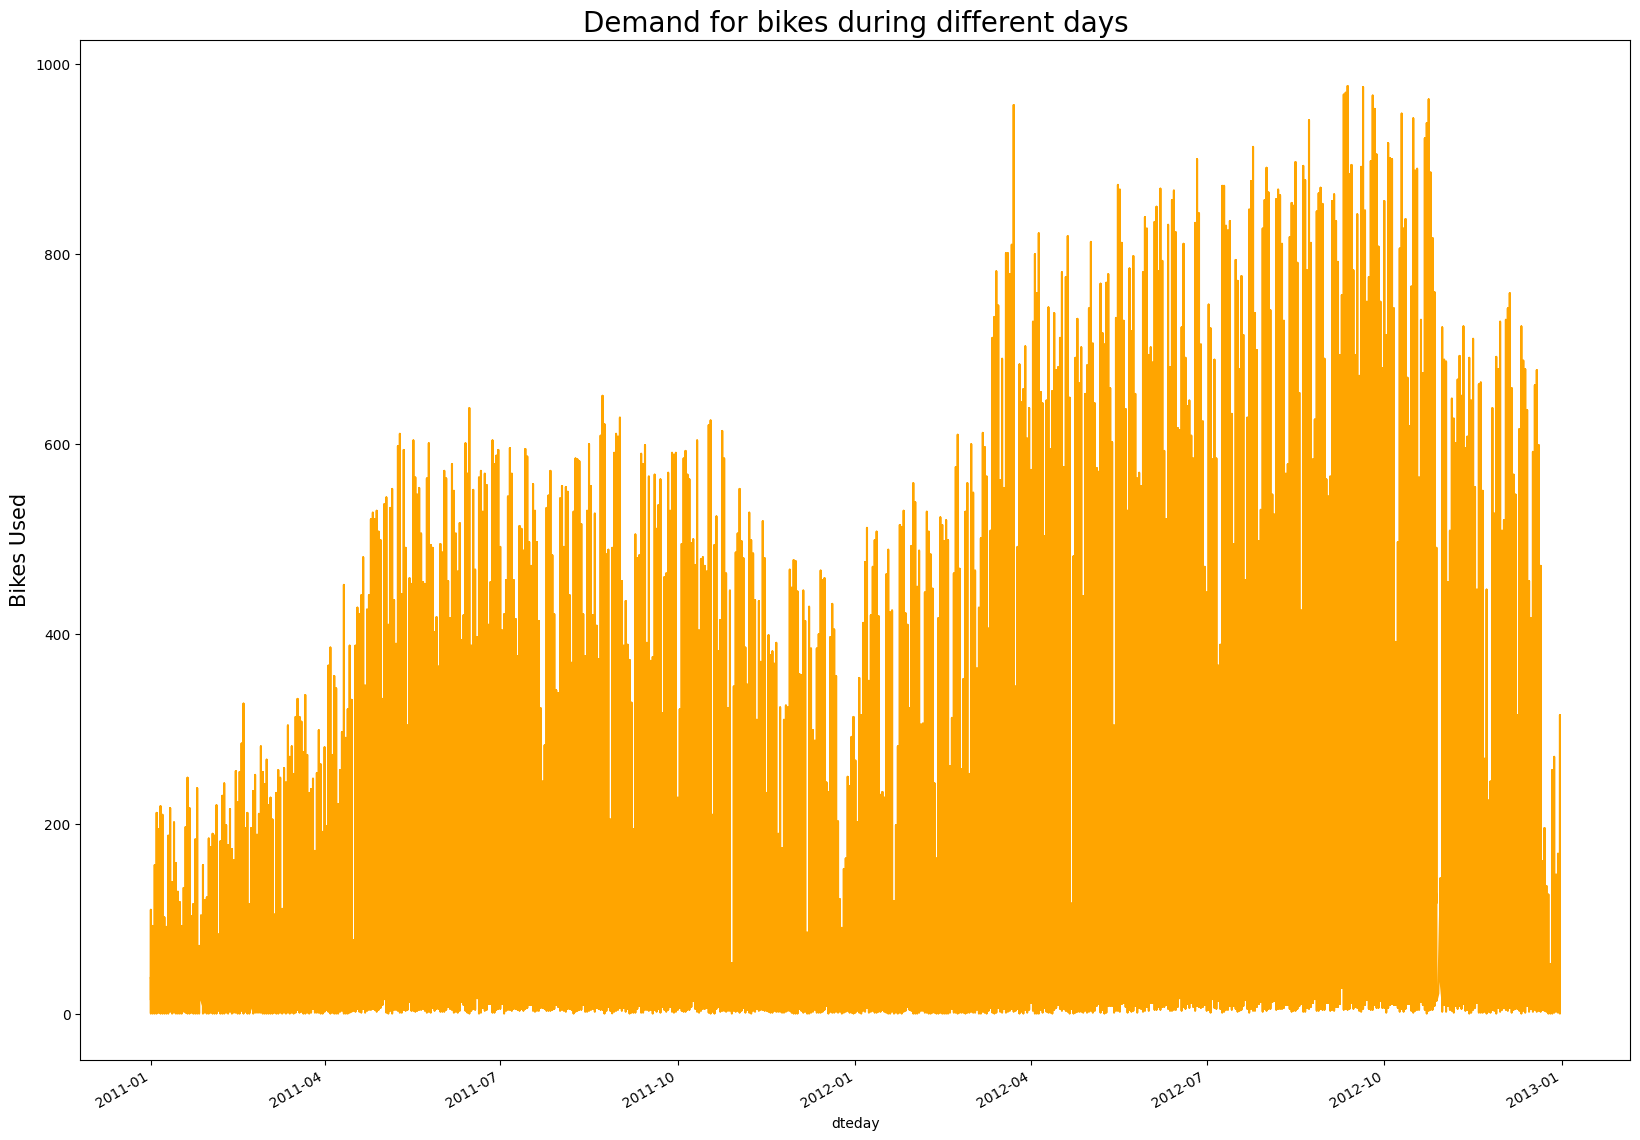

In [86]:
plt.figure(figsize = (20, 15))
univariate_data_df.plot(color = 'orange')
plt.title('Demand for bikes during different days', fontsize = 20)
plt.ylabel('Bikes Used', fontsize = 15)
plt.show()

In [87]:
univariate_data_df

dteday
2011-01-01     16
2011-01-01     40
2011-01-01     32
2011-01-01     13
2011-01-01      1
             ... 
2012-12-31    119
2012-12-31     89
2012-12-31     90
2012-12-31     61
2012-12-31     49
Name: cnt, Length: 17379, dtype: int64

In [88]:
univariate_data_df.head()

dteday
2011-01-01    16
2011-01-01    40
2011-01-01    32
2011-01-01    13
2011-01-01     1
Name: cnt, dtype: int64

In [89]:
univariate_data_df.values

array([16, 40, 32, ..., 90, 61, 49], dtype=int64)

In [90]:
univariate_data_df.shape

(17379,)

In [91]:
uni_data = univariate_data_df.values

In [92]:
uni_data

array([16, 40, 32, ..., 90, 61, 49], dtype=int64)

In [93]:
import tensorflow as tf

In [94]:
TRAIN_SPLIT = 10000

tf.random.set_seed(101)

uni_train_mean = uni_data[: TRAIN_SPLIT].mean()
uni_train_std = uni_data[: TRAIN_SPLIT].std()

In [95]:
uni_data = (uni_data - uni_train_mean) / uni_train_std

In [96]:
uni_data

array([-0.95731558, -0.77662082, -0.83685241, ..., -0.4001734 ,
       -0.6185129 , -0.70886028])

In [97]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []
    
    start_index = start_index + history_size
    
    if end_index is None:
        end_index = len(dataset) - target_size
        
    for i in range(start_index, end_index):
        indices = range(i - history_size, i)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i + target_size])
    return np.array(data), np.array(labels)

In [98]:
univariate_past_history = 24
univariate_future_target = 0

In [99]:
x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT, univariate_past_history, univariate_future_target)

x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None, univariate_past_history, univariate_future_target)

In [100]:
print(x_train_uni.shape)
print(y_train_uni.shape)
print(x_val_uni.shape)
print(y_val_uni.shape)

(9976, 24, 1)
(9976,)
(7355, 24, 1)
(7355,)


In [101]:
def create_time_steps(length):
    return (list(range(-length, 0)))

print(create_time_steps(20))

[-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1]


In [102]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'bx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    
    if delta: 
        future = delta
    else:
        future = 0
        
    plt.figure(figsize = (20, 10))    
    plt.title(title, fontsize = 20)

    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize = 10, label = labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label = labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])


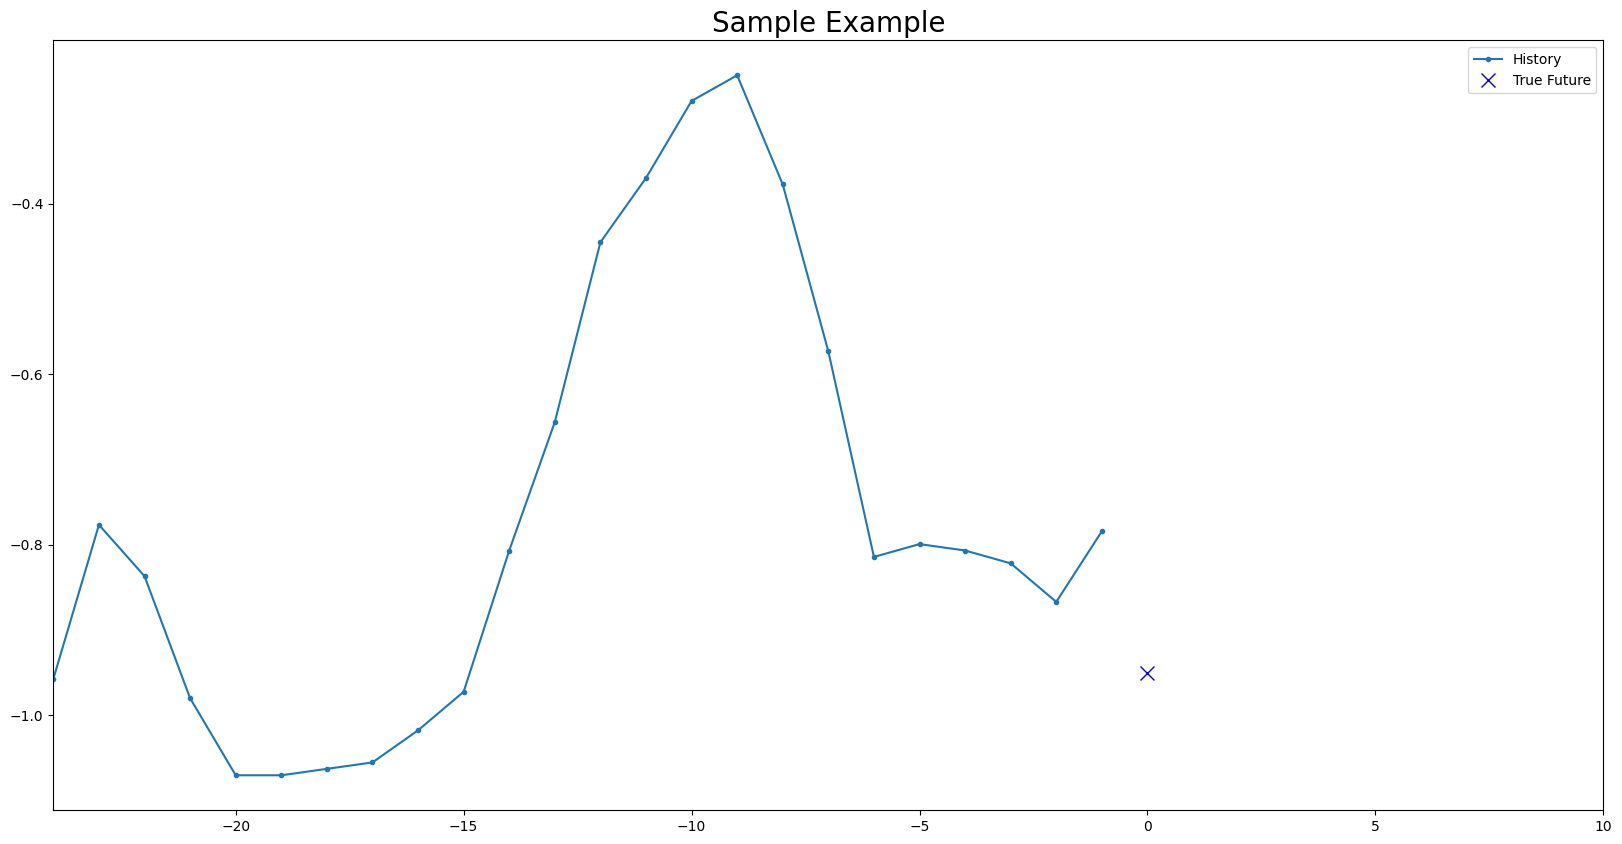

In [103]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

In [104]:
def mwa(history):
    return np.mean(history)

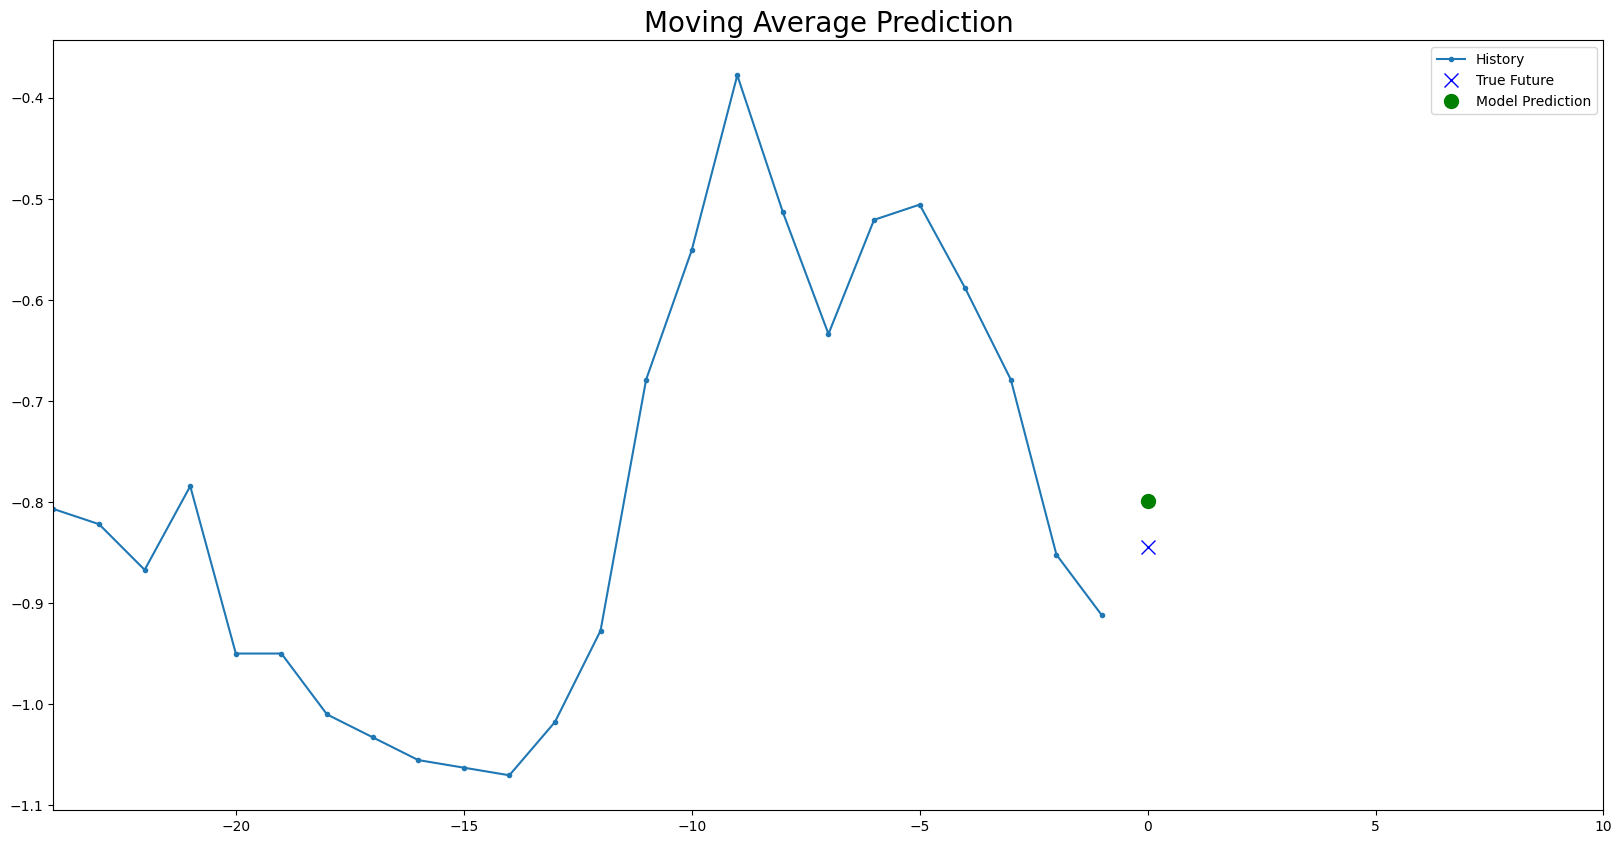

In [105]:
i = 20
show_plot([x_train_uni[i], y_train_uni[i], mwa(x_train_uni[i])], 0, 'Moving Average Prediction')

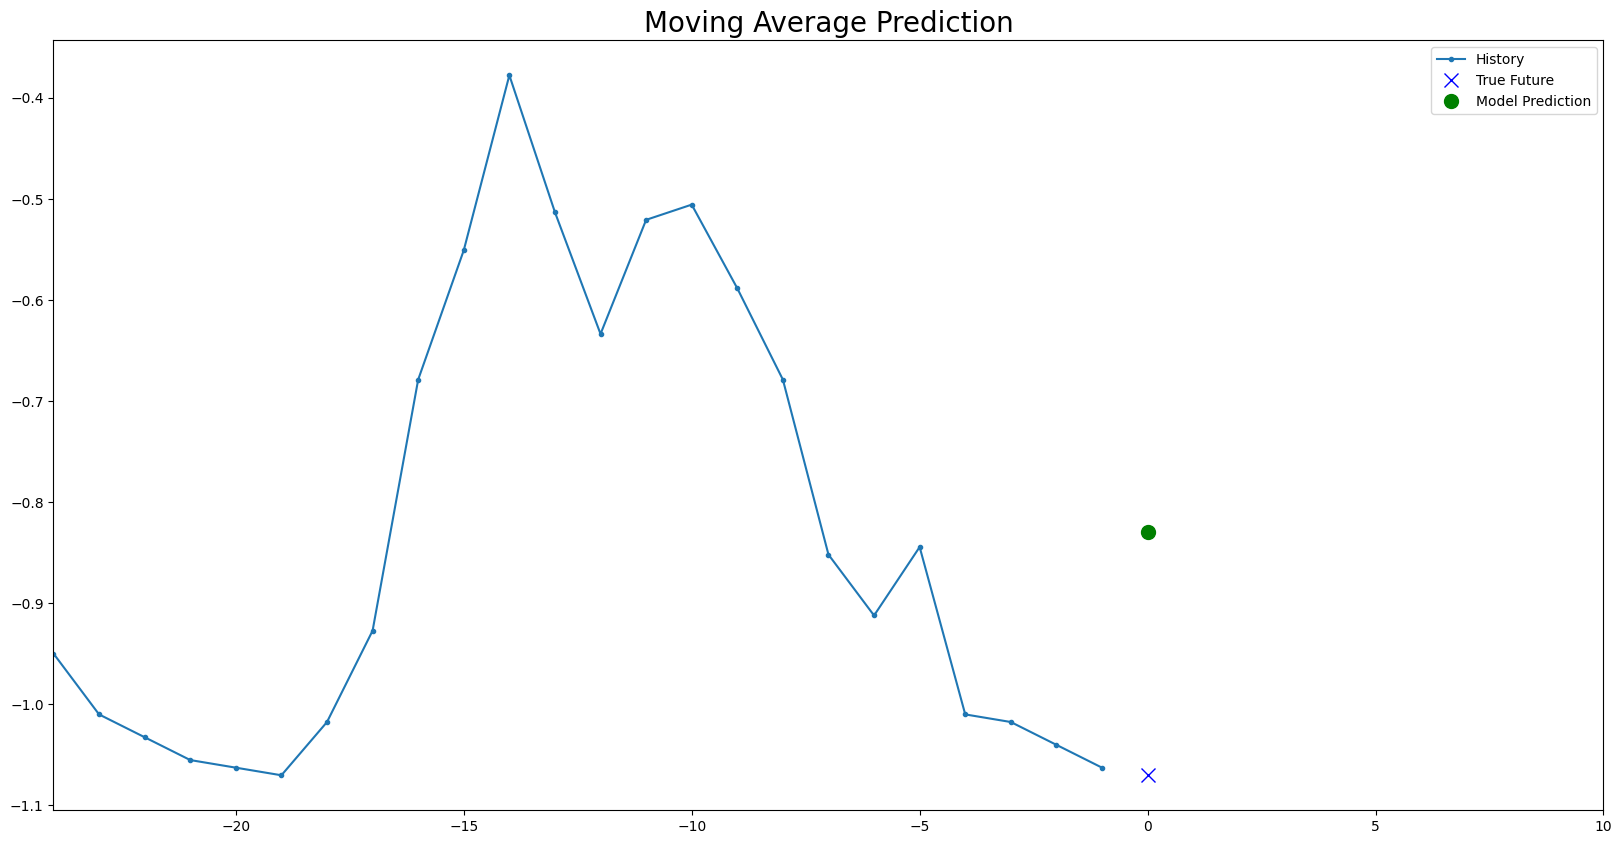

In [106]:
i = 25
show_plot([x_train_uni[i], y_train_uni[i], mwa(x_train_uni[i])], 0, 'Moving Average Prediction')

In [107]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

In [108]:
print(train_univariate)
print(val_univariate)

<_RepeatDataset element_spec=(TensorSpec(shape=(None, 24, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
<_RepeatDataset element_spec=(TensorSpec(shape=(None, 24, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


In [109]:
simple_lstm_model = tf.keras.models.Sequential([tf.keras.layers.LSTM(32, input_shape = x_train_uni.shape[-2:]),
                                              tf.keras.layers.Dense(1)])

In [110]:
simple_lstm_model.compile(optimizer = 'adam', loss = 'mae')

In [111]:
STEPS_PER_EPOCH = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs = EPOCHS, steps_per_epoch = STEPS_PER_EPOCH, validation_data = val_univariate, 
                     validation_steps = 50)

Epoch 1/10
200/200 [==============================] - 6s 14ms/step - loss: 0.4728 - val_loss: 0.5531
Epoch 2/10
200/200 [==============================] - 2s 12ms/step - loss: 0.2792 - val_loss: 0.4784
Epoch 3/10
200/200 [==============================] - 2s 12ms/step - loss: 0.2496 - val_loss: 0.4533
Epoch 4/10
200/200 [==============================] - 2s 12ms/step - loss: 0.2395 - val_loss: 0.4552
Epoch 5/10
200/200 [==============================] - 3s 13ms/step - loss: 0.2345 - val_loss: 0.4520
Epoch 6/10
200/200 [==============================] - 2s 12ms/step - loss: 0.2325 - val_loss: 0.4511
Epoch 7/10
200/200 [==============================] - 2s 12ms/step - loss: 0.2283 - val_loss: 0.4437
Epoch 8/10
200/200 [==============================] - 2s 12ms/step - loss: 0.2231 - val_loss: 0.4484
Epoch 9/10
200/200 [==============================] - 2s 12ms/step - loss: 0.2166 - val_loss: 0.4392
Epoch 10/10
200/200 [==============================] - 2s 12ms/step - loss: 0.2113 - val_lo

8/8 [==============================] - 0s 3ms/step


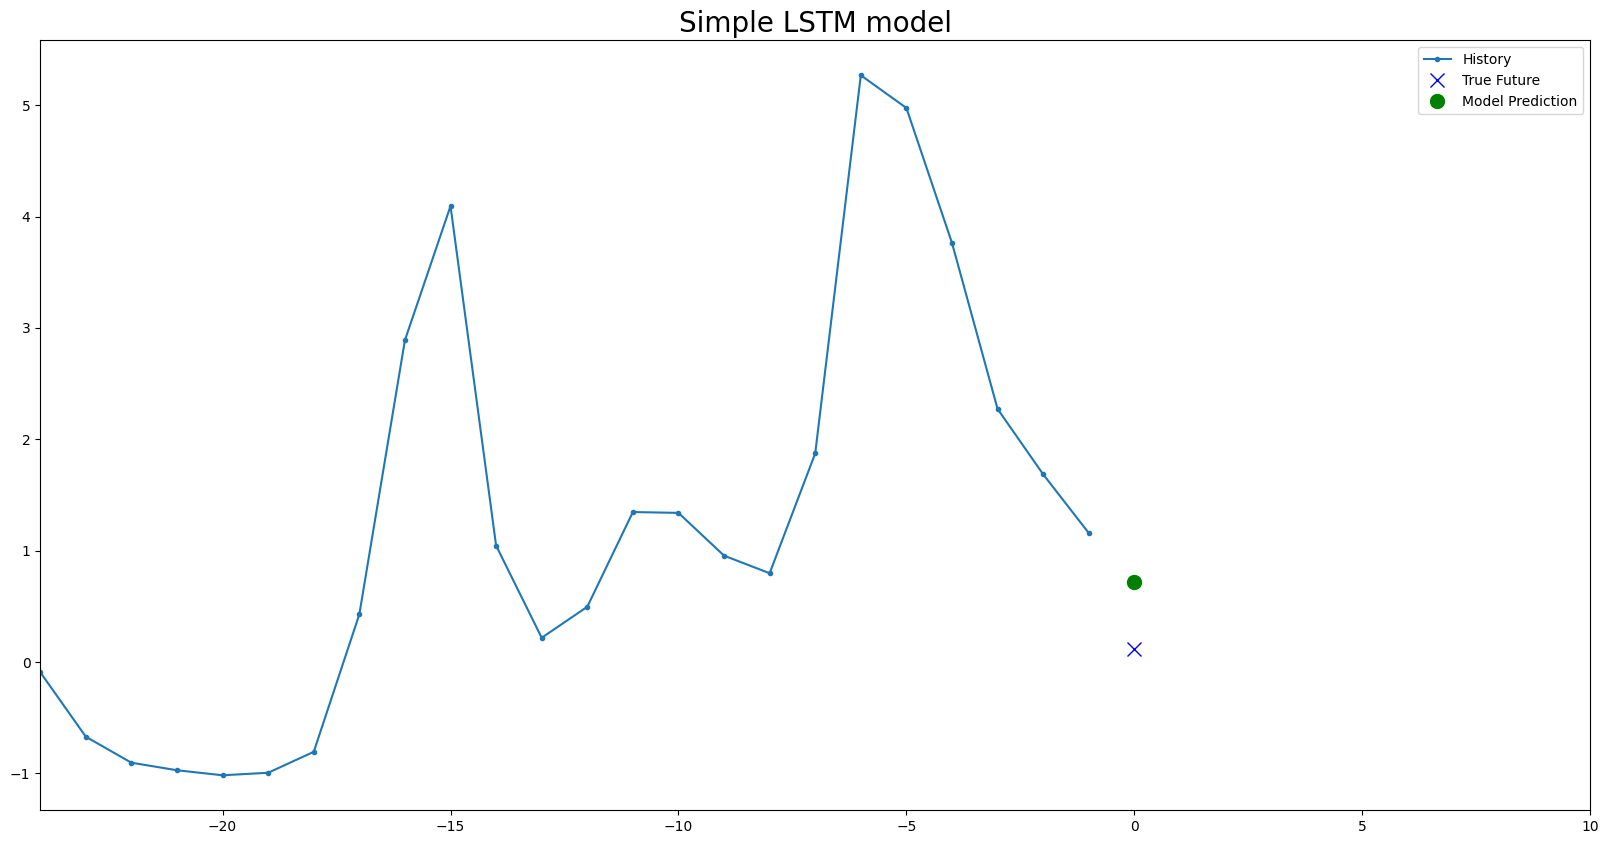

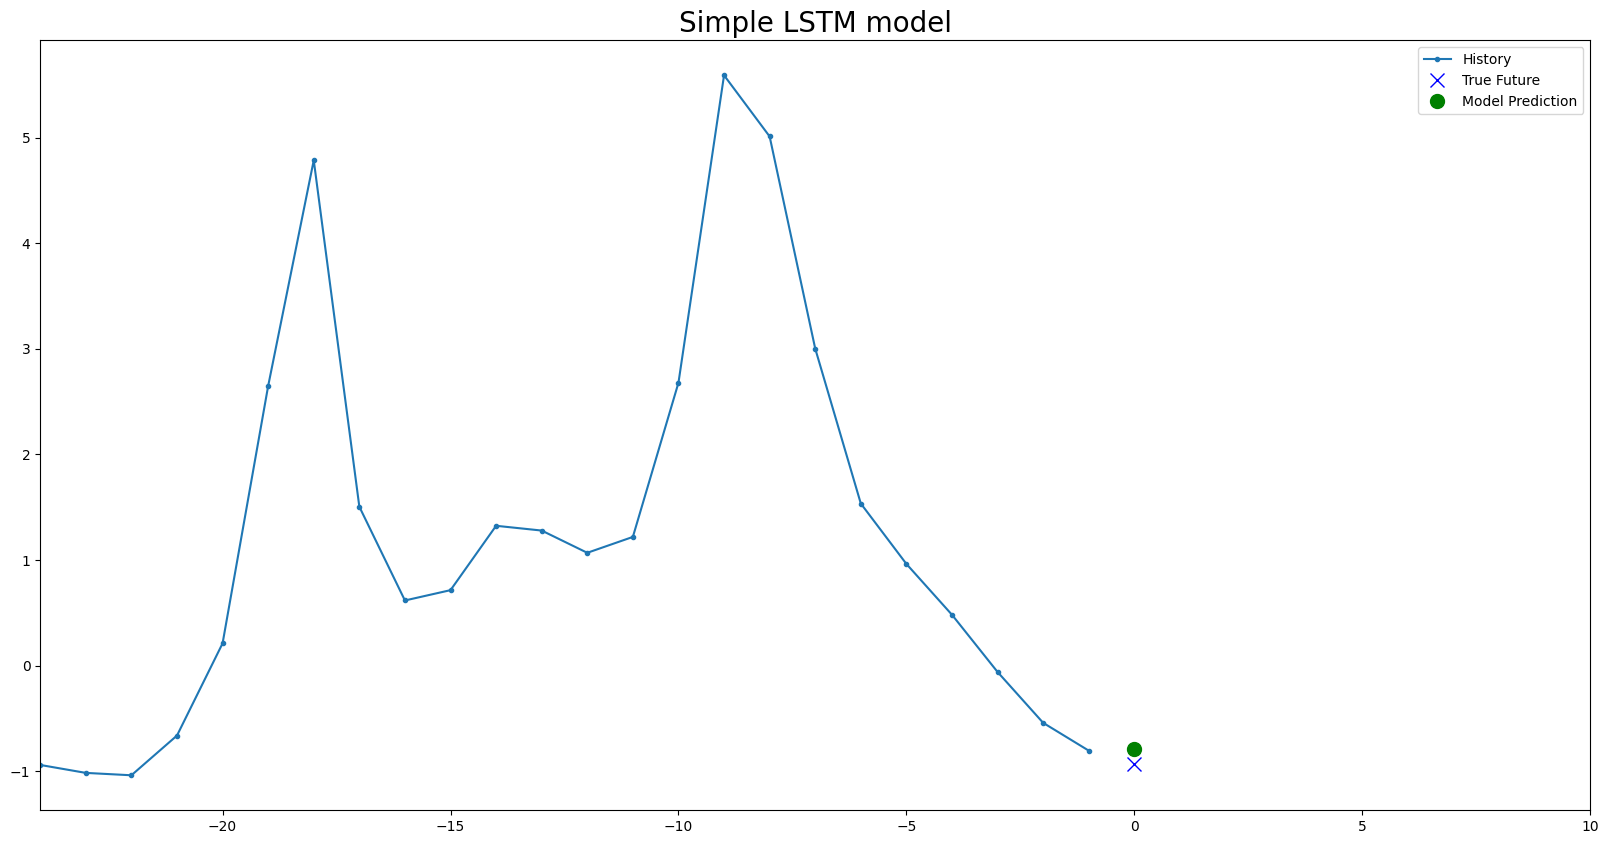

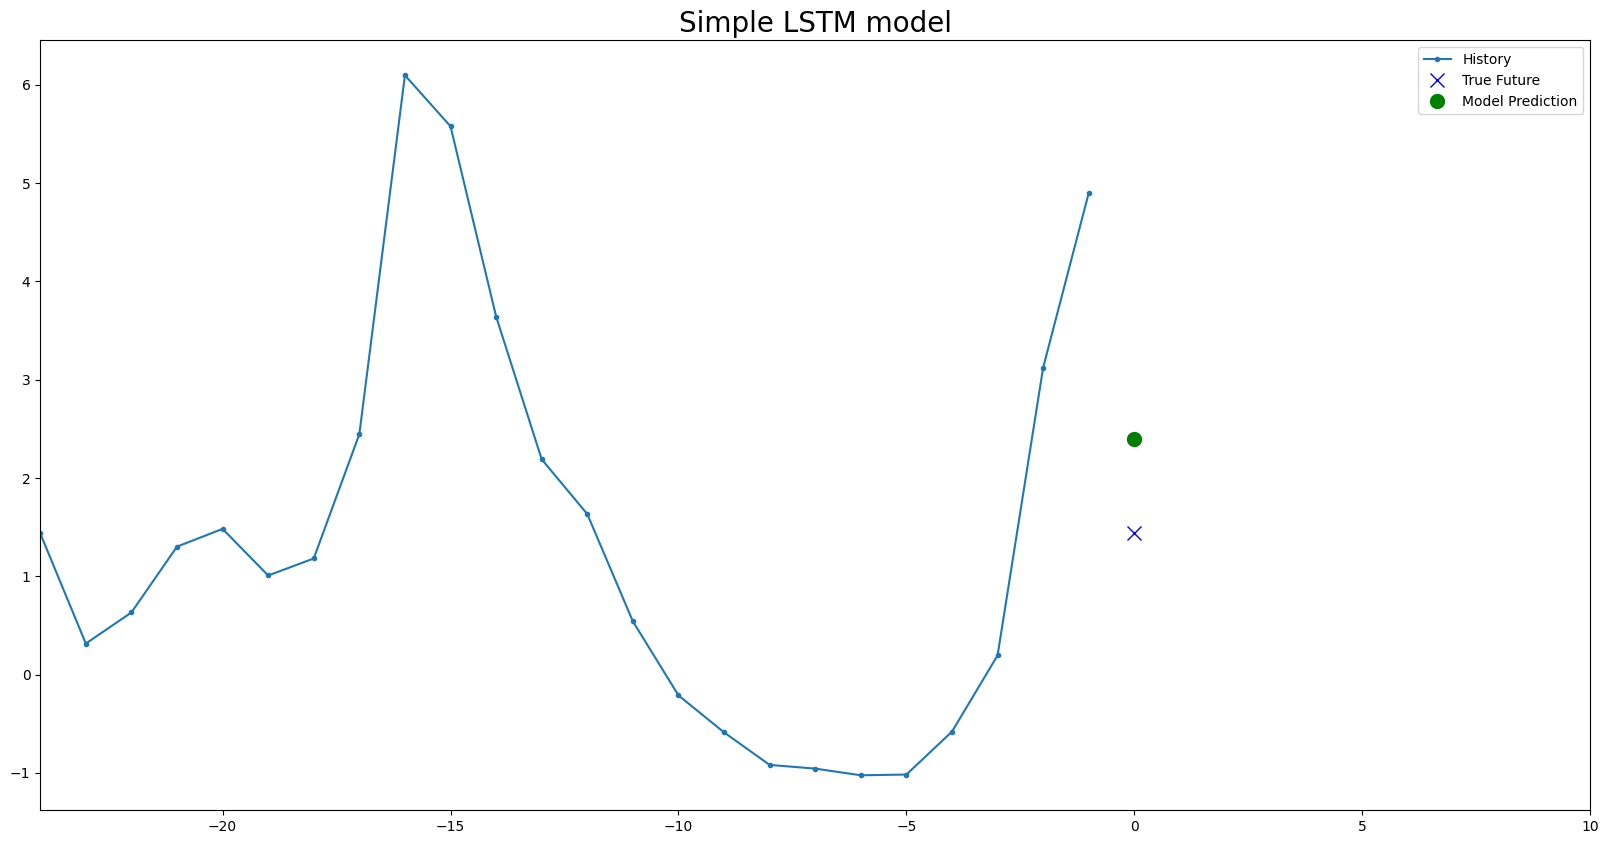

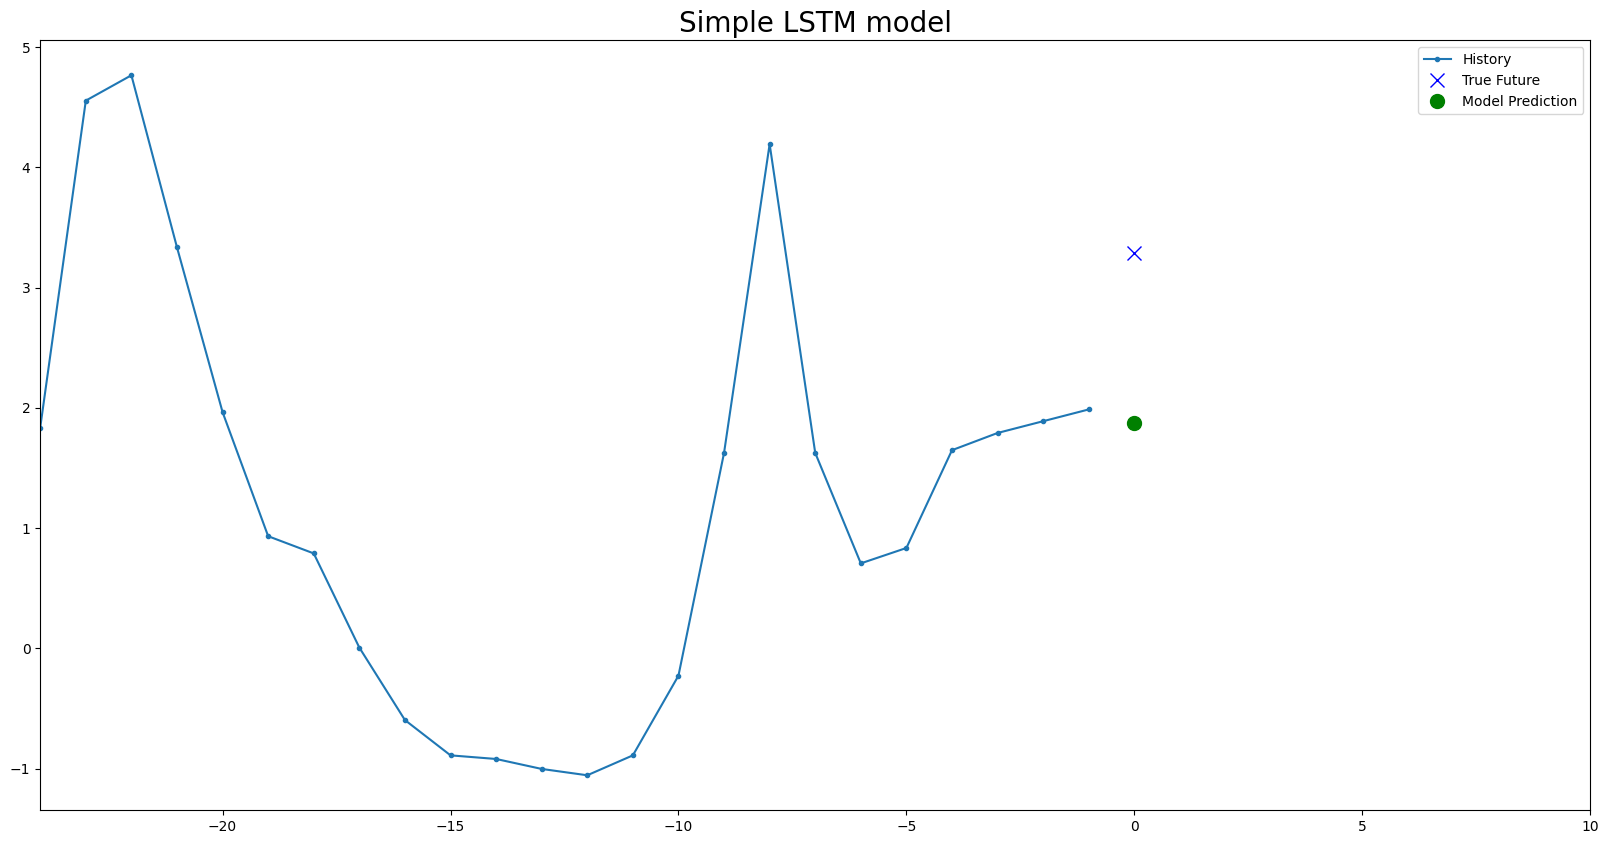

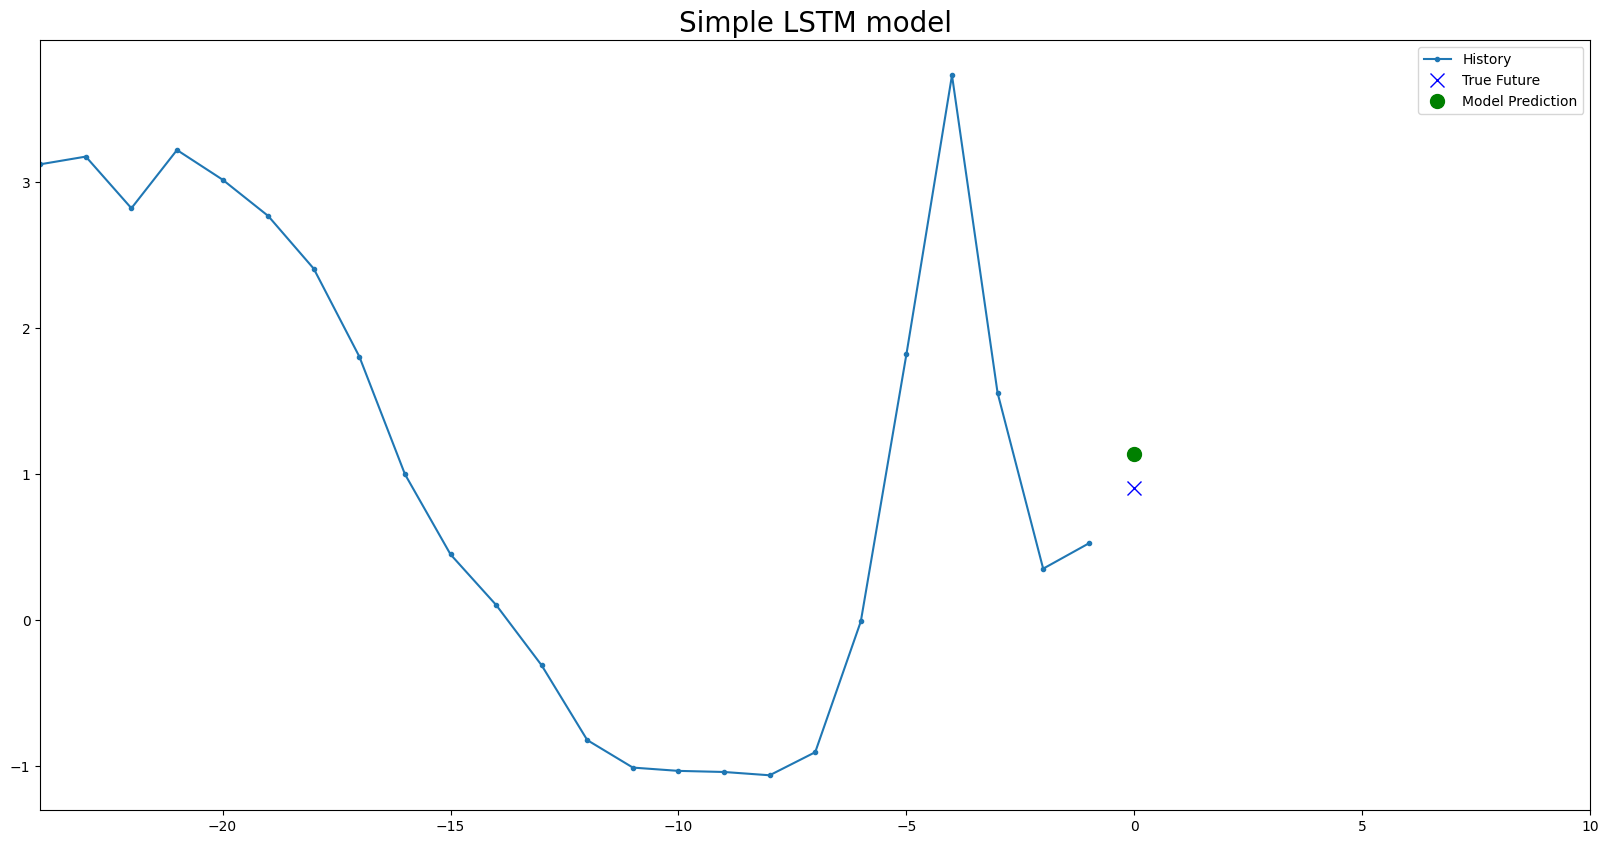

In [112]:
for x, y in val_univariate.take(5):
    plot = show_plot([x[0].numpy(), y[0].numpy(), simple_lstm_model.predict(x)[0]], 0, 
                    'Simple LSTM model')

In [113]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,Temperature_converted,Temperature_segments
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,1,0.2552,0.3
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,1,0.2356,0.3
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,1,0.2356,0.3
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,1,0.2552,0.3
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1,0.2552,0.3


In [114]:
features_considered = ['season', 'holiday', 'weekday', 'workingday', 'hum', 'windspeed', 'temp']
features = df[features_considered]
features.index = df['dteday']
features.head()

,season,holiday,weekday,workingday,hum,windspeed,temp
dteday,,,,,,,
2011-01-01,1,0,6,0,0.81,0.0,0.24
2011-01-01,1,0,6,0,0.80,0.0,0.22
2011-01-01,1,0,6,0,0.80,0.0,0.22
2011-01-01,1,0,6,0,0.75,0.0,0.24
2011-01-01,1,0,6,0,0.75,0.0,0.24


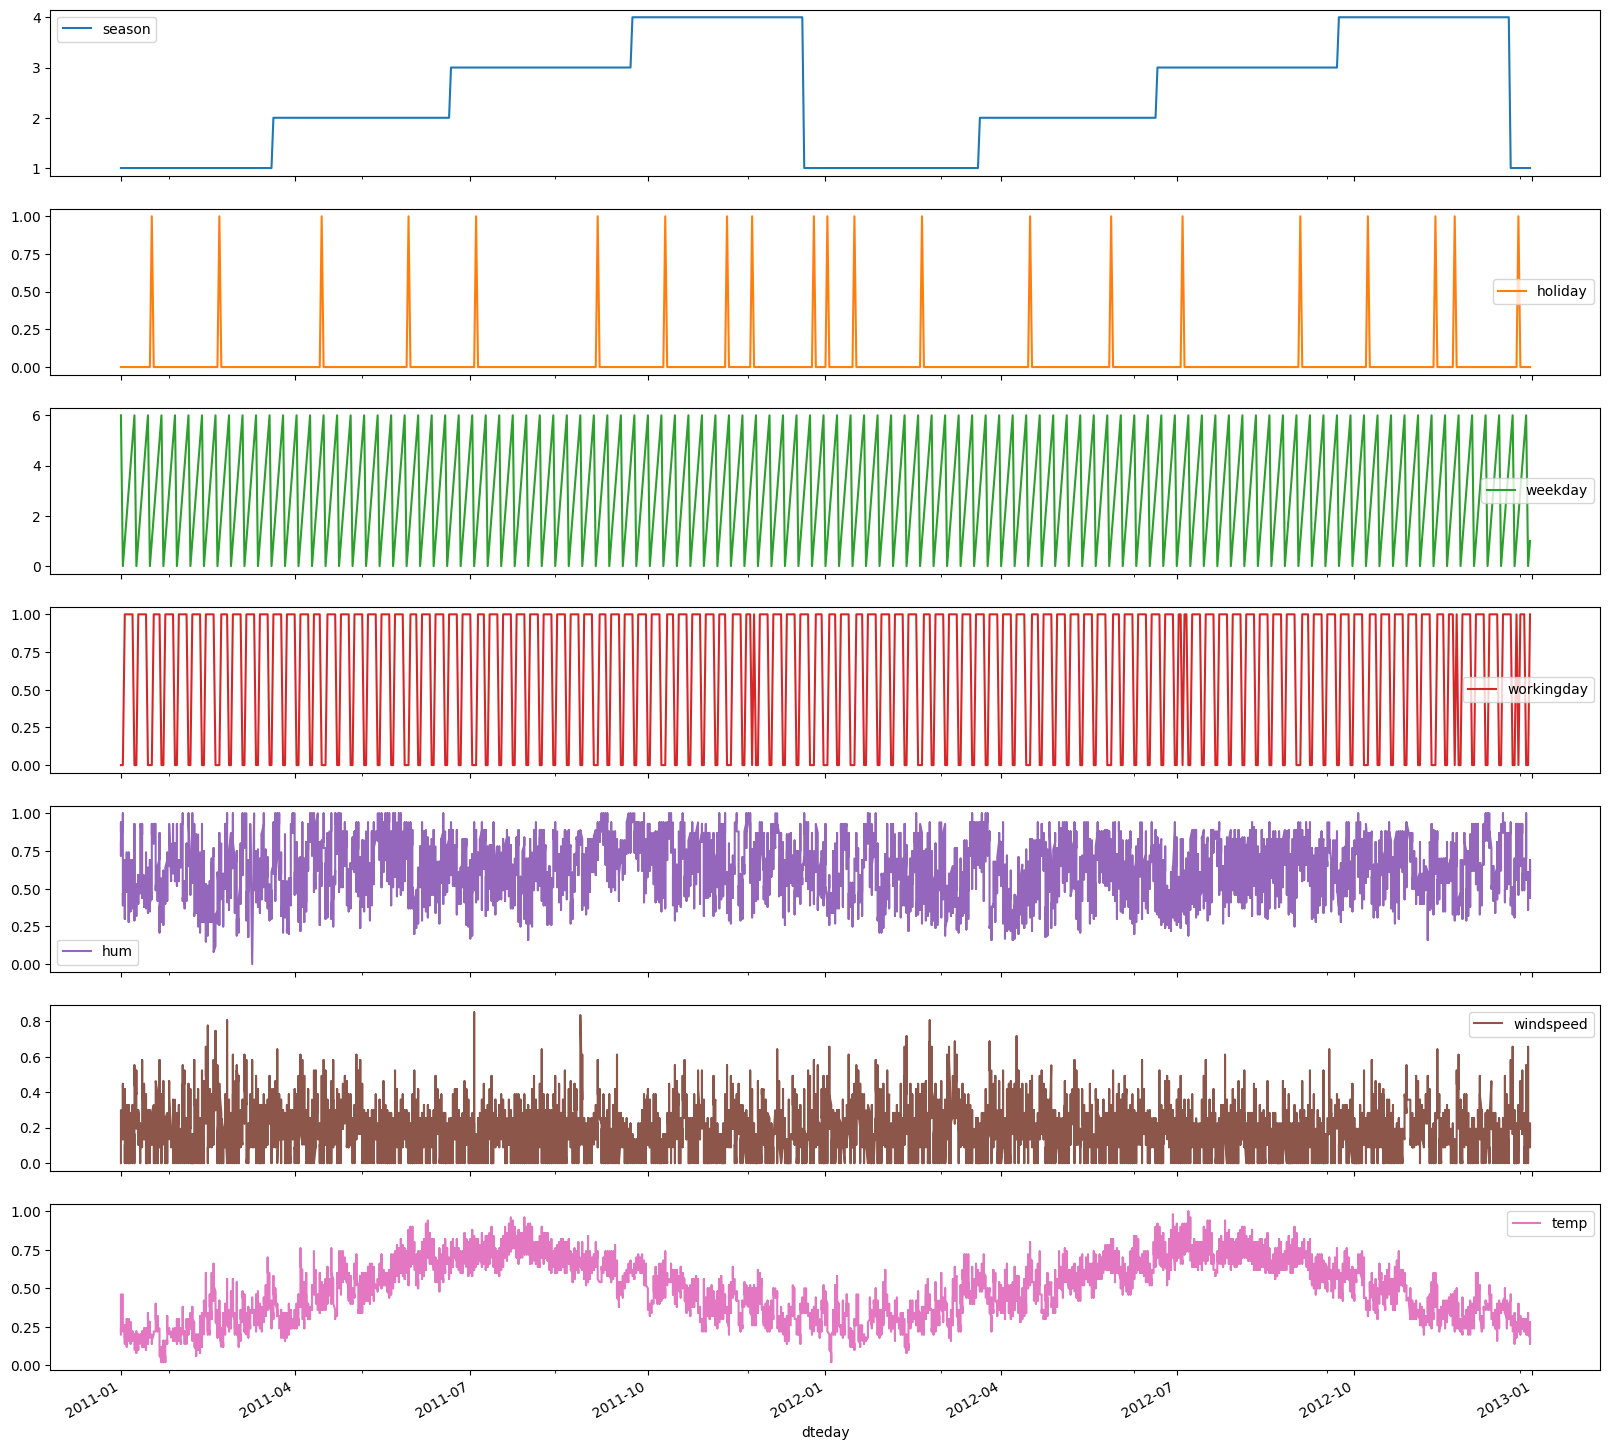

In [115]:
features.plot(subplots = True, figsize = (20, 20))
plt.show()

In [116]:
dataset = features.values
data_mean = dataset[: TRAIN_SPLIT].mean(axis = 0)
data_std = dataset[: TRAIN_SPLIT].std(axis = 0)

dataset = (dataset - data_mean) / data_std

In [117]:
dataset

array([[-1.13686896, -0.17856443,  1.49080573, ...,  0.88824146,
        -1.55227718, -1.11380105],
       [-1.13686896, -0.17856443,  1.49080573, ...,  0.83741597,
        -1.55227718, -1.21403062],
       [-1.13686896, -0.17856443,  1.49080573, ...,  0.83741597,
        -1.55227718, -1.21403062],
       ...,
       [-1.13686896, -0.17856443, -0.99951522, ..., -0.17909377,
        -0.23677596, -1.01357149],
       [-1.13686896, -0.17856443, -0.99951522, ..., -0.38239572,
        -0.47632216, -1.01357149],
       [-1.13686896, -0.17856443, -0.99951522, ...,  0.07503367,
        -0.47632216, -1.01357149]])

In [118]:
def multivariate_data(dataset, target, start_index, end_index, history_size, target_size, step, single_step = False):
    data = []
    labels = []
    
    start_index = start_index + history_size
    
    if end_index is None:
        end_index = len(dataset) - target_size
     

    for i in range(start_index, end_index):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])
        
        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i: i + target_size])
    return np.array(data), np.array(labels)

In [119]:
past_history = 24
future_target = 0
STEP = 1

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0, TRAIN_SPLIT, past_history,
                                                  future_target, STEP, single_step = True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1], TRAIN_SPLIT, None, past_history,
                                              future_target, STEP, single_step = True)

print(x_train_single.shape)
print(y_train_single.shape)

(9976, 24, 7)
(9976,)


In [120]:
len([x_train_single, y_train_single])

2

In [121]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

print(train_data_single)
print(val_data_single)

<_RepeatDataset element_spec=(TensorSpec(shape=(None, 24, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
<_RepeatDataset element_spec=(TensorSpec(shape=(None, 24, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


In [122]:
single_step_model = tf.keras.models.Sequential()

single_step_model.add(tf.keras.layers.LSTM(60, 
                                          input_shape = x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))
single_step_model.compile(optimizer = tf.keras.optimizers.RMSprop(), loss = 'mae')
single_step_history = single_step_model.fit(train_data_single, epochs = EPOCHS, steps_per_epoch = STEPS_PER_EPOCH,
                                           validation_data = val_data_single,
                                           validation_steps = 50)

Epoch 1/10
200/200 [==============================] - 6s 20ms/step - loss: 0.0952 - val_loss: 0.0376
Epoch 2/10
200/200 [==============================] - 4s 18ms/step - loss: 0.0403 - val_loss: 0.0302
Epoch 3/10
200/200 [==============================] - 4s 19ms/step - loss: 0.0329 - val_loss: 0.0251
Epoch 4/10
200/200 [==============================] - 4s 18ms/step - loss: 0.0299 - val_loss: 0.0275
Epoch 5/10
200/200 [==============================] - 4s 18ms/step - loss: 0.0284 - val_loss: 0.0227
Epoch 6/10
200/200 [==============================] - 4s 18ms/step - loss: 0.0271 - val_loss: 0.0206
Epoch 7/10
200/200 [==============================] - 4s 18ms/step - loss: 0.0260 - val_loss: 0.0248
Epoch 8/10
200/200 [==============================] - 4s 19ms/step - loss: 0.0253 - val_loss: 0.0209
Epoch 9/10
200/200 [==============================] - 4s 18ms/step - loss: 0.0242 - val_loss: 0.0224
Epoch 10/10
200/200 [==============================] - 4s 19ms/step - loss: 0.0236 - val_lo

In [123]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(loss))
    plt.figure(figsize = (20, 10))
    plt.plot(epochs, loss, 'b', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title(title, fontsize = 15)
    plt.legend()
    plt.grid()
    
    plt.show()

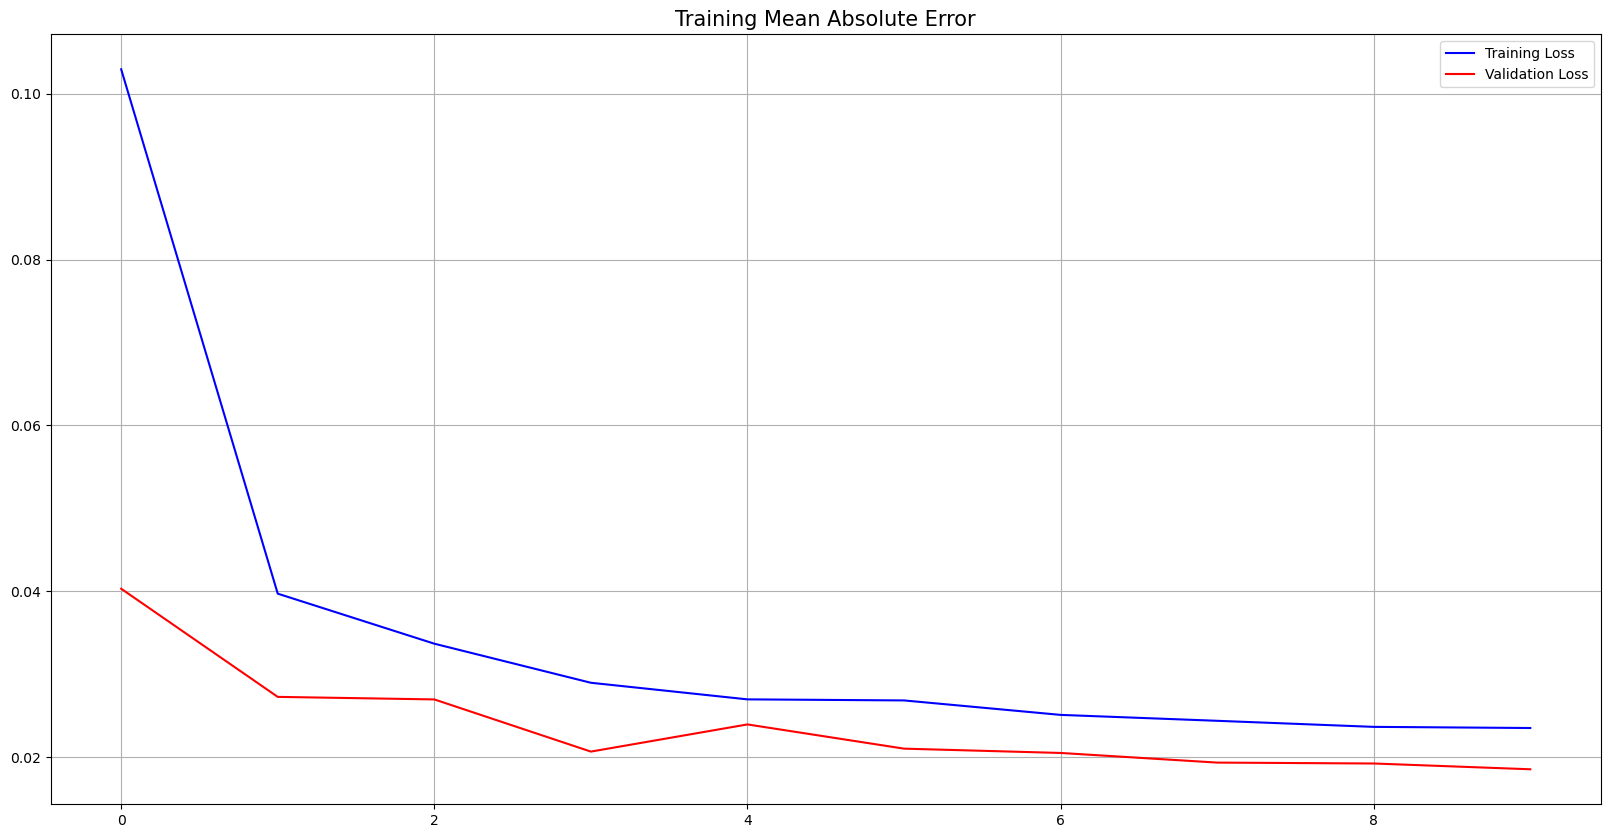

In [104]:
plot_train_history(single_step_history, 'Training Mean Absolute Error')

In [124]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'bx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    
    if delta: 
        future = delta
    else:
        future = 0
        
    plt.figure(figsize = (20, 10))    
    plt.title(title, fontsize = 20)

    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize = 10, label = labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label = labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])


It is also important to remove the other featuers such as 'instant' and 'dteday' as those features are objects and they cannot be represented in the form of numerical digits respectively. Therefore, we are going to remove them as can be seen below. 

In [125]:
df.drop(['instant', 'dteday'], axis = 1, inplace = True)

In [126]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,Temperature_converted,Temperature_segments
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,1,0.2552,0.3
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,1,0.2356,0.3
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,1,0.2356,0.3
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,1,0.2552,0.3
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1,0.2552,0.3


## 3. Machine learning Analysis 

Now, it is time to apply machine learning analysis and ensure that we get the best predictions for the demand for bikes respectively. The first thing that we would be doing would be to separate the X values and the y values and differentiate between the target variable and the input features. Therefore, we use X and y as these variables to ensure that we get the best predictions in the machine learning models respectively. 

In [127]:
X = df.drop(['cnt'], axis = 1).values
y = df['cnt'].values

In [128]:
X[0: 5]

array([[1.    , 0.    , 1.    , 0.    , 0.    , 6.    , 0.    , 1.    ,
        0.24  , 0.2879, 0.81  , 0.    , 1.    , 0.2552, 0.3   ],
       [1.    , 0.    , 1.    , 1.    , 0.    , 6.    , 0.    , 1.    ,
        0.22  , 0.2727, 0.8   , 0.    , 1.    , 0.2356, 0.3   ],
       [1.    , 0.    , 1.    , 2.    , 0.    , 6.    , 0.    , 1.    ,
        0.22  , 0.2727, 0.8   , 0.    , 1.    , 0.2356, 0.3   ],
       [1.    , 0.    , 1.    , 3.    , 0.    , 6.    , 0.    , 1.    ,
        0.24  , 0.2879, 0.75  , 0.    , 1.    , 0.2552, 0.3   ],
       [1.    , 0.    , 1.    , 4.    , 0.    , 6.    , 0.    , 1.    ,
        0.24  , 0.2879, 0.75  , 0.    , 1.    , 0.2552, 0.3   ]])

It is important to divide the data into training and cross-validation so that we would be able to tune the hyperparameters for different machine learning models and ensure that we get the best predcitions for different machine learning models. It is important to get good hyperparameter values that ensure that different machine learning models perform well on the test set respectively. 

In [129]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 101)

Taking a look at the dataframe, we see that there are about 12165 rows and 15 features that we would be finally working with on the training input features. 

In [130]:
X_train.shape

(12165, 15)

It is also important to featurize the columns and ensure that the values of the input features lie between 0 and 1 so that the weights that are optimized would be quite limited rather than having different weights range for different features. We use the scaler which is called 'MinMaxScaler' that would perform these duties for us. 

In [131]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_cv = scaler.transform(X_cv)

In [132]:
X_train.shape

(12165, 15)

## 3.1 Deep Neural Network

The machine learning model that we would first be using is the deep neural network. There are different hidden units and we have chosen the value of activation to be 'relu' respectively. There are different optimizers and metrics that we have selected before fitting the machine learning model for predictions in the cross-validation data respectively. 

In [133]:
model = Sequential()
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'MSE', metrics = ['MSE', 'MAE'])

We would train the machine learning model for 200 iterations so that it would optimize the weights and ensure that it performs well on the cross-validation data respectively. 

In [134]:
model.fit(X_train, y_train, epochs = 200, verbose = 1, validation_data = (X_cv, y_cv))

Epoch 1/200
381/381 [==============================] - 2s 2ms/step - loss: 30368.8789 - MSE: 30368.8789 - MAE: 127.6174 - val_loss: 20367.0371 - val_MSE: 20367.0371 - val_MAE: 110.2783
Epoch 2/200
381/381 [==============================] - 1s 2ms/step - loss: 19759.8867 - MSE: 19759.8867 - MAE: 102.8754 - val_loss: 18845.9180 - val_MSE: 18845.9180 - val_MAE: 100.4388
Epoch 3/200
381/381 [==============================] - 1s 2ms/step - loss: 18491.9277 - MSE: 18491.9277 - MAE: 98.6708 - val_loss: 17685.9727 - val_MSE: 17685.9727 - val_MAE: 98.5441
Epoch 4/200
381/381 [==============================] - 1s 2ms/step - loss: 16789.8223 - MSE: 16789.8223 - MAE: 92.9615 - val_loss: 15497.8154 - val_MSE: 15497.8154 - val_MAE: 91.2885
Epoch 5/200
381/381 [==============================] - 1s 2ms/step - loss: 14756.3086 - MSE: 14756.3086 - MAE: 86.5183 - val_loss: 14719.0889 - val_MSE: 14719.0889 - val_MAE: 92.8490
Epoch 6/200
381/381 [==============================] - 1s 2ms/step - loss: 13241.

## Scatterplot between Y_test and Y_predictions

Taking a look at the scatterplot, we can see that the predictions are not quite far from the actual demand for bikes respectively. We are using the cross-validation output and checking how well the machine learning model is doing on the test set. 

In [141]:
y_predicted = model.predict(X_cv)
y_predicted.shape


 48/163 [=======>......................] - ETA: 0s

163/163 [==============================] - 0s 2ms/step


(5214, 1)

In [143]:
y_cv.shape

(5214,)

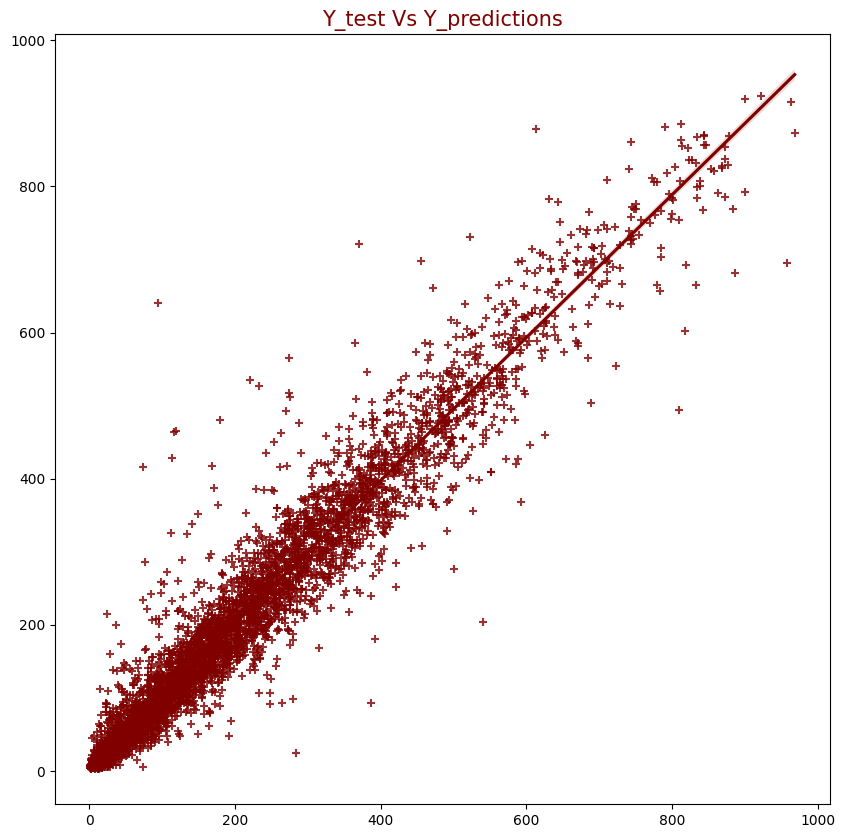

In [145]:
plt.figure(figsize = (10, 10))
sns.regplot(x=y_cv, y=y_predicted, marker = '+', color = 'maroon')
plt.title('Y_test Vs Y_predictions', color = 'maroon', fontsize = 15)
plt.show()

## 3.2 K-Nearest Neighbors

We would be using hyperparameter tuning to get the best neighbors for the k-nearest neighbors algorithm. In KNN, we have to select the number of nearest neighbors and the algorithm would take into consideration the number of the nearest neighbors for making predictions respectively. Higher the number of nearest neighbors, the algorithm would be more biased towards the majority class as it would take decision based on the number of nearest neighbors respectively. Therefore, we have to select the right hyperparameter to ensure that we get the best predictions in the cross-validation data. Different values for the hyperparameters are given below along with the iteration so that those values are fit into the training set and we get the values in the cross-validation data. 

In [146]:
model = KNeighborsRegressor()
mean_squared_error_list = []
mean_absolute_error_list = []
roc_auc_score_list = []
K_nearest_neighbors = [2, 3, 5, 8, 10, 11, 15, 20]
for i in K_nearest_neighbors:
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_cv)
    mean_squared_error_list.append(mean_squared_error(y_predict, y_cv))
    mean_absolute_error_list.append(mean_absolute_error(y_predict, y_cv))
    

Creating a dictionary of the dataframe so that we would be able to understand the different errors present in the output respectively. 

In [147]:
knn_dictionary = {'K Nearest Neighbors': K_nearest_neighbors, 'Mean Squared Error': mean_squared_error_list, 'Mean Absolute Error': mean_absolute_error_list}

In [148]:
knn_dataframe = pd.DataFrame(knn_dictionary)

For different values of the nearest neighbors, we get different mean squared error and mean absolute errors respectively. 

In [149]:
knn_dataframe

,K Nearest Neighbors,Mean Squared Error,Mean Absolute Error
0,2,12945.821634,72.429613
1,3,12988.908942,74.552551
2,5,12877.145593,77.035980
3,8,13144.370688,80.216173
4,10,13321.801494,81.892923
5,11,13412.503048,82.678767
6,15,13905.591458,85.300997
7,20,14263.848400,87.385616


## Lineplot between Neighbors and the Mean Squared Error 

As can be seen from the image below that with the increase in the value of K, there is an increase in the error. The best value of K as can be seen is 5. Therefore, we would be using the value in our predictions as that is the best K value out of the K values that we have tested during the cross-validation phase of our machine learning task. 

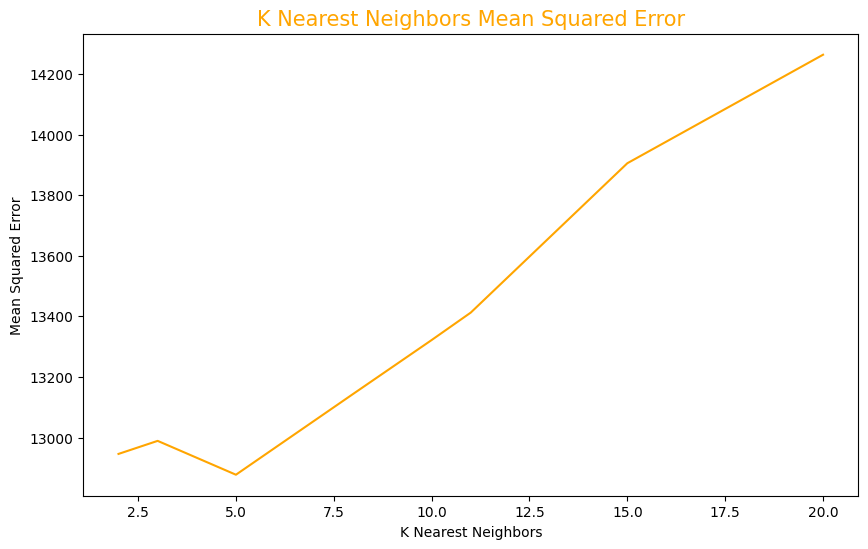

In [150]:
plt.figure(figsize = (10, 6))
sns.lineplot(x = 'K Nearest Neighbors', y = 'Mean Squared Error', data = knn_dataframe, color = 'orange')
plt.title("K Nearest Neighbors Mean Squared Error", fontsize = 15, color = 'orange')
plt.show()

## Lineplot between Neighbors and Mean Absolute Error

This follows an increasing trend where with the increase in the value of K, there is an increase in the mean absolute error respectively. Therefore, there is a good increase in the mean absolute error as well with the increase in the value of K. The best value of K here is 2 as the error is minimum at this point. Since Mean Absolute Error is an important metric, we'll stick on to having the best value of K to be 5 so that we can get the most accurate predictions respectively. 

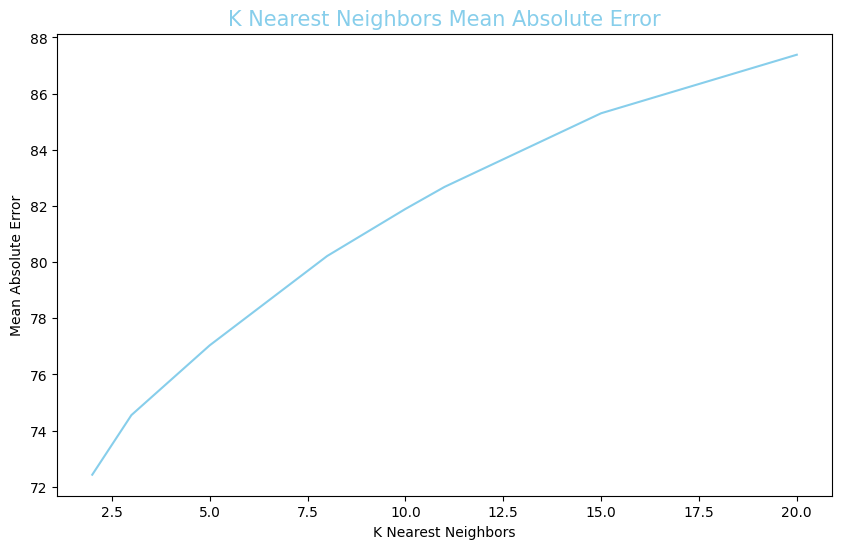

In [151]:
plt.figure(figsize = (10, 6))
sns.lineplot(x = 'K Nearest Neighbors', y = 'Mean Absolute Error', data = knn_dataframe, color = 'skyblue')
plt.title("K Nearest Neighbors Mean Absolute Error", fontsize = 15, color = 'skyblue')
plt.show()

In [152]:
best_neighbor_index = np.argmin(mean_squared_error_list)

In [153]:
best_neighbor = K_nearest_neighbors[best_neighbor_index]

## Scatterplot between Y_test and Y_predictions

We see that the K Nearest Regressor does not do so well as we see that the values of y_test and y_predictions are quite scattered rather than fitting in the straight line as shown. Therefore, we can conclude that K Nearest Regressor is quite a good machine learning model for our task as we can see that the values are quite scattered between y_test and y_predictions respectively. 

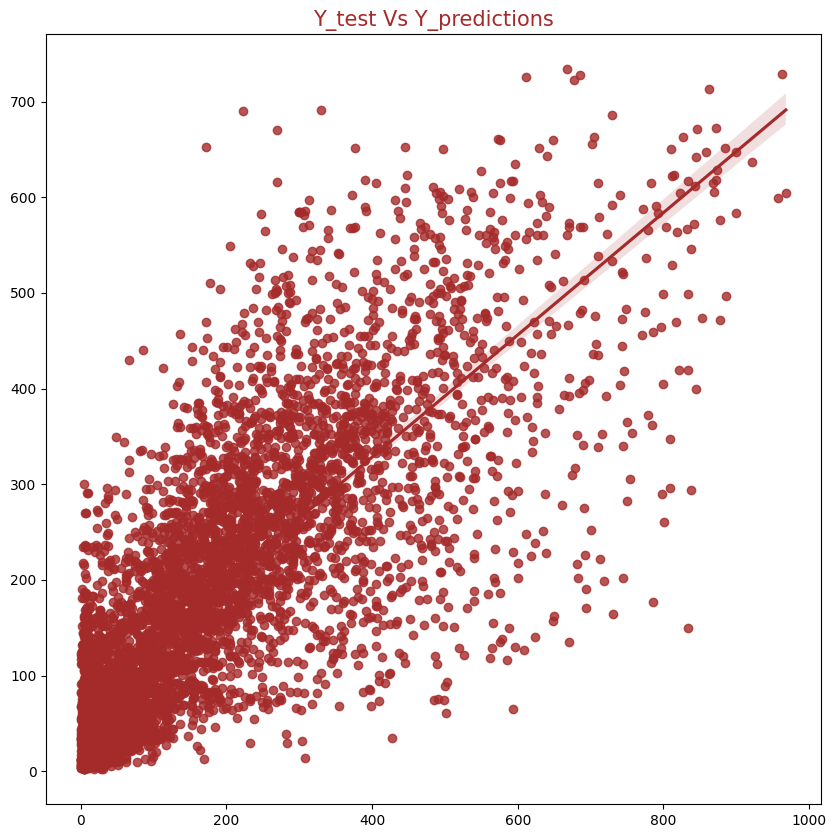

In [155]:
model = KNeighborsRegressor(n_neighbors = best_neighbor)
model.fit(X_train, y_train)
y_predict = model.predict(X_cv)
plt.figure(figsize = (10, 10))
sns.regplot(x=y_cv, y=y_predict, color = 'brown')
plt.title('Y_test Vs Y_predictions', fontsize = 15, color = 'brown')
plt.show()

## 3.3 PLS Regression

This is one more form of regression where we have the freedom to select the number of components which is a hyperparameter. We would be tuning the hyperparameter and testing different values and see which values are going to give the best predictions respectively. 

In [156]:
n_components_list = [2, 3, 5, 7, 10]
mean_squared_error_list = []
mean_absolute_error_list = []
for i in n_components_list:
    model = PLSRegression(n_components = i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_cv)
    mean_squared_error_list.append(mean_squared_error(y_predict, y_cv))
    mean_absolute_error_list.append(mean_absolute_error(y_predict, y_cv))

In [157]:
pls_regression_dict = {'Number of Components': n_components_list, 'Mean Absolute Error': mean_absolute_error_list,
                      'Mean Squared Error': mean_squared_error_list}

In [158]:
pls_regression_dataframe = pd.DataFrame(pls_regression_dict)

In [159]:
pls_regression_dataframe

,Number of Components,Mean Absolute Error,Mean Squared Error
0,2,106.391810,20255.890519
1,3,106.132008,20005.275451
2,5,105.580811,19935.640591
3,7,105.685001,19937.672480
4,10,105.694856,19928.941616


In [160]:
def plot_function(dataframe):
    fig, axes = plt.subplots(1, 2, figsize = (15, 5))
    sns.lineplot(ax = axes[0], x = dataframe.columns[0], y = 'Mean Absolute Error', data = dataframe)
    axes[0].set_title('Number of Components Vs Mean Absolute Error', fontsize = 15)
    sns.lineplot(ax = axes[1], x = dataframe.columns[0], y = 'Mean Squared Error', data = dataframe)
    axes[1].set_title('Number of Components Vs Mean Squared Error', fontsize = 15)
    fig.tight_layout()

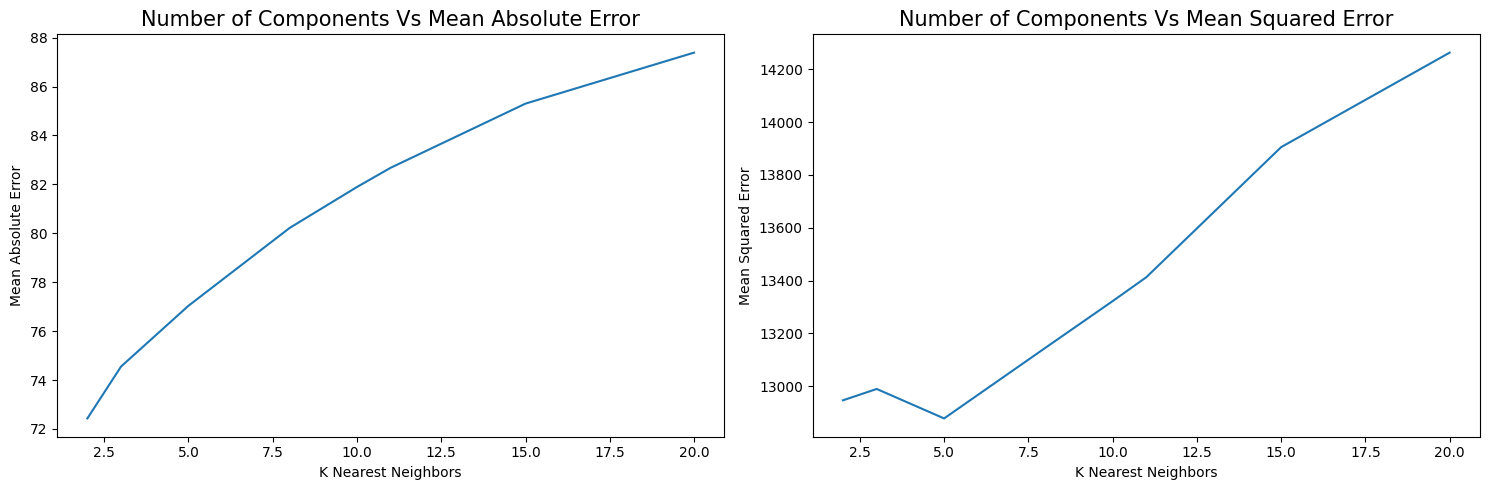

In [161]:
plot_function(knn_dataframe)

## Plots for PLS Regression

We would now be looking at both the mean absolute error plot and the mean squared error plots respectively. As can be seen, the best value of the number of components is 5 as that is where the mean absolute error is minimum and the mean squared error is also quite low respectively. Though there are other values of components where the mean squared error is lower, we select the best hyperparameter so that the error is low not just for the mean squared error but also the mean absolute error respectively. 

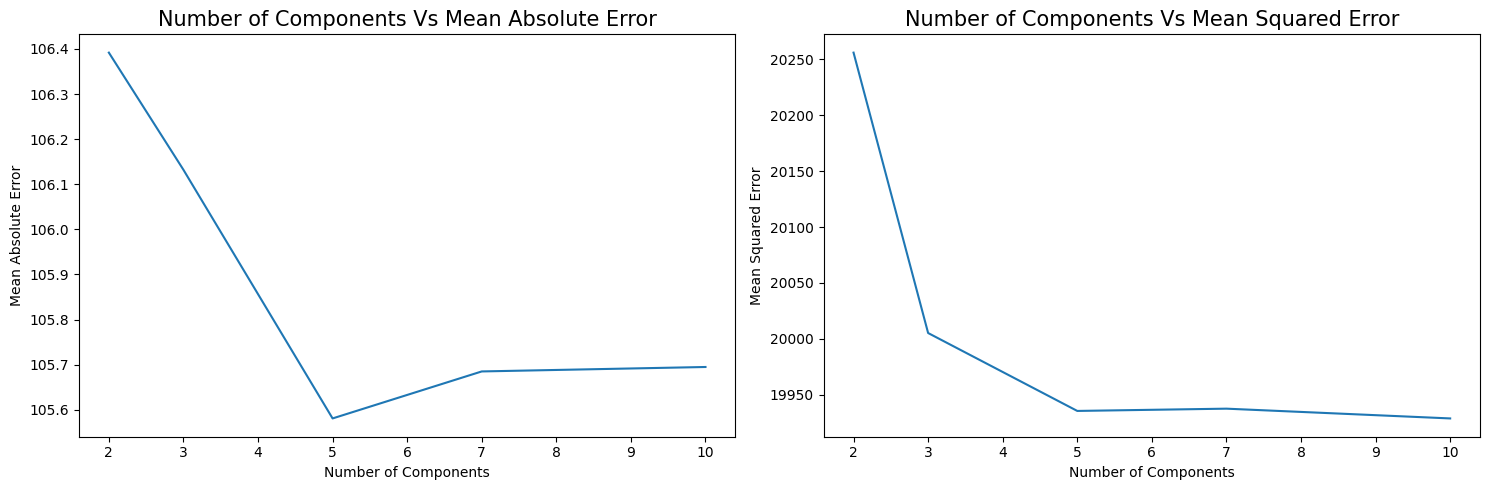

In [162]:
plot_function(pls_regression_dataframe)

## 3.4 Decision Tree Regressor 

Using Decision Tree Regressor, we have quite a few hyperparameters but we would be working with just one hyperparameter which is the depth of the tree. Let us choose different values for the max depth and see how the values influence different machine learning outcomes respectively. 

In [163]:
max_depth_list = [10, 15, 16, 17, 18, 20, 25]
mean_absolute_error_list = []
mean_squared_error_list = []
for i in max_depth_list:
    model = DecisionTreeRegressor(max_depth = i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_cv)
    mean_absolute_error_list.append(mean_absolute_error(y_predict, y_cv))
    mean_squared_error_list.append(mean_squared_error(y_predict, y_cv))
decision_tree_dict = {'Max Depth': max_depth_list, 'Mean Absolute Error': mean_absolute_error_list,
                     'Mean Squared Error': mean_squared_error_list}
decision_tree_dataframe = pd.DataFrame(decision_tree_dict)
    

## Decision Tree Regressor 

We would be looking at different decision tree regressor max depth values and see how the values would change based on different values respectively. In addition to this, we see that the value of max depth is the best when it is 15 for both the mean squared error and the mean absolute error respectively. Therefore, the best value of the max depth is 15 where both the mean squared error and the mean absolute error is the lowest respectively. 

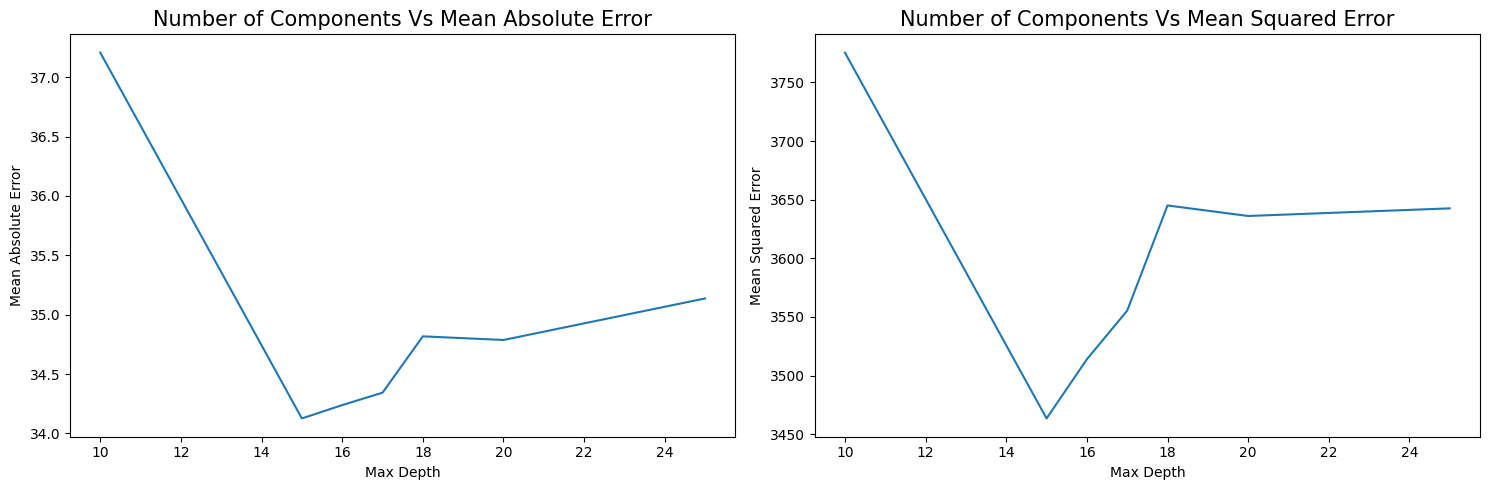

In [164]:
plot_function(decision_tree_dataframe)

In [165]:
best_max_depth_index = np.argmin(mean_absolute_error_list)
best_max_depth = max_depth_list[best_max_depth_index]

## Y_test and Y_predictions

We can see from the below scatterplot that the decision tree regressor was able to make very close predictions on the test set as can be seen. The predictions and the actual test output values are quite close to each other respectively. Therefore, decision tree regressor could be used in the prediction of the output. But let us also take a look at the other machine learning models and see how well they do on the test set respectively.

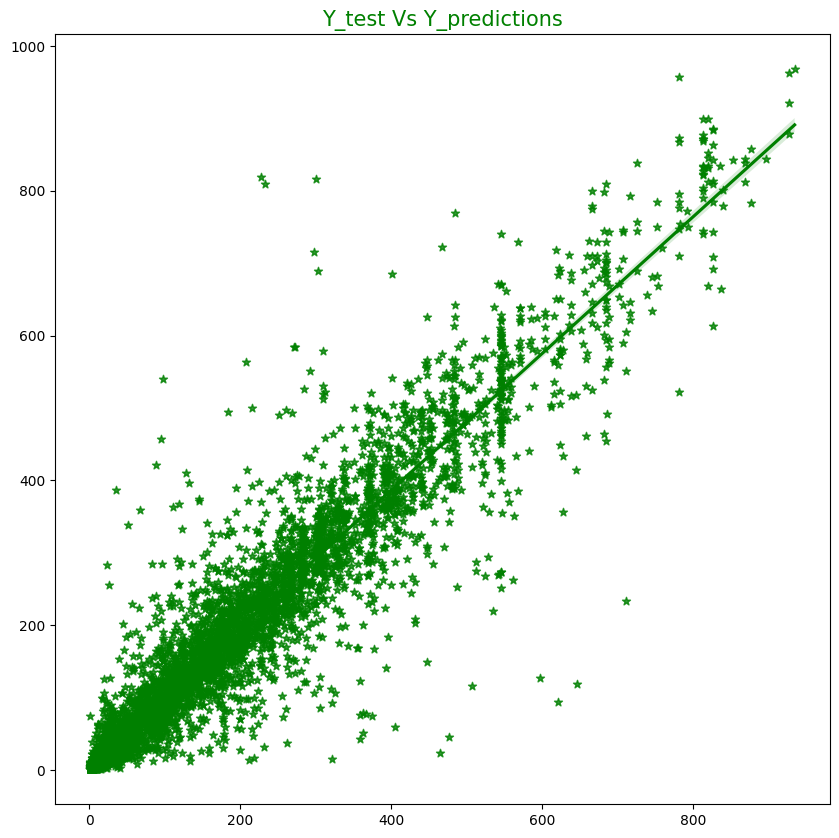

In [167]:
model = DecisionTreeRegressor(max_depth = best_max_depth)
model.fit(X_train, y_train)
y_predict = model.predict(X_cv)
plt.figure(figsize = (10, 10))
sns.regplot(x=y_predict, y=y_cv, marker = '*', color = 'green')
plt.title('Y_test Vs Y_predictions', fontsize = 15, color = 'green')
plt.show()

In [168]:
from sklearn.ensemble import GradientBoostingRegressor

## 3.5 Gradient Boosting Regressor

Now it is time to use the most used machine learning model for predictions respectively. We would be using the gradient boosting decision tree model and ensure that we are going to get the best predictions respectively. We see that there are number of estimators which is a hyperparameter that we need to tune and get the lowest error for both the mean squared error and the mean absolute error respectively.

In [169]:
n_estimators_list = [25, 50, 100, 150, 200, 400, 1000]
mean_squared_error_list = []
mean_absolute_error_list = []
for i in n_estimators_list:
    model = GradientBoostingRegressor(n_estimators = i, max_depth = 10)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_cv)
    mean_squared_error_list.append(mean_squared_error(y_cv, y_predict))
    mean_absolute_error_list.append(mean_absolute_error(y_cv, y_predict))
gradient_boosting_regressor_dict = {"Number of Estimators": n_estimators_list, "Mean Absolute Error": mean_absolute_error_list,
                                   "Mean Squared Error": mean_squared_error_list}
gradient_boosting_regressor_dataframe = pd.DataFrame(gradient_boosting_regressor_dict)   

## Plots of Mean Absolute Error and Mean Squared Error 

We can easily see from the below that as the number of estimators keep increasing, the machine learning model keeps improving. Therefore, we would be training the model with different number of estimators and get the lowest possible error. There are different number of components that we are going to be learning and using to ensure that we get the best machine learning models for prediction respectively.

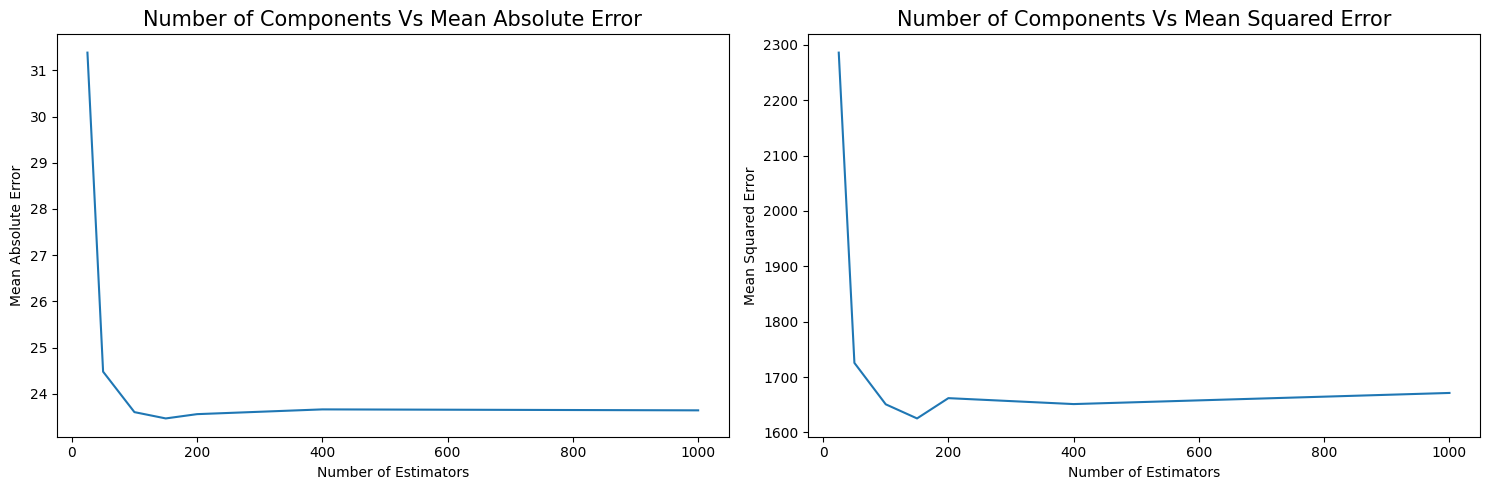

In [170]:
plot_function(gradient_boosting_regressor_dataframe)

In [171]:
gradient_boosting_regressor_dataframe

,Number of Estimators,Mean Absolute Error,Mean Squared Error
0,25,31.384066,2285.741944
1,50,24.478164,1725.579960
2,100,23.602207,1650.808901
3,150,23.465637,1625.307205
4,200,23.558462,1661.932932
5,400,23.661292,1651.224311
6,1000,23.640682,1671.309998


In [172]:
n_estimators_index = np.argmin(mean_squared_error_list)
best_n_estimators = n_estimators_list[n_estimators_index]

In [173]:
model = GradientBoostingRegressor(n_estimators = best_n_estimators, max_depth = 10)
model.fit(X_train, y_train)
y_predict = model.predict(X_cv)

## Scatterplot between Y_test and Y_predictions

Below we see that there is quite a linear line that could be drawn from the predictions and the actual test values respectively. In addition to this, we see that the model is performing quite well compared to the other machine learning models. Therefore, we would be using this machine learning model for deployment as it is performing well on the cross-validation set respectively. 

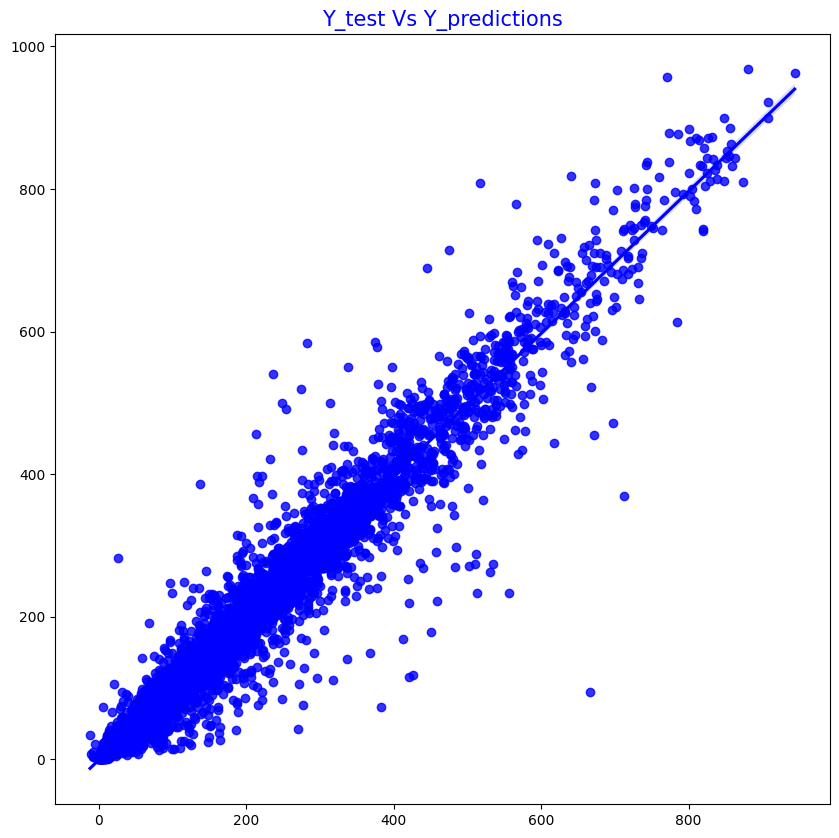

In [175]:
plt.figure(figsize = (10, 10))
sns.regplot(x=y_predict, y=y_cv, marker = 'o', color = 'blue')
plt.title("Y_test Vs Y_predictions", fontsize = 15, color = 'blue')
plt.show()

## 3.6 Logistic Regression 

Now let us use the logistic regression model and see how well the model does. As can be seen from the plot below, it is not performing as close to the other machine learning models respectively. Therefore, it is better to use other machine learning models for prediction respectively.

The mean squared error of the linear regression model is 19922.843506579553
The mean absolute error of the linear regression model is 105.68394196546679


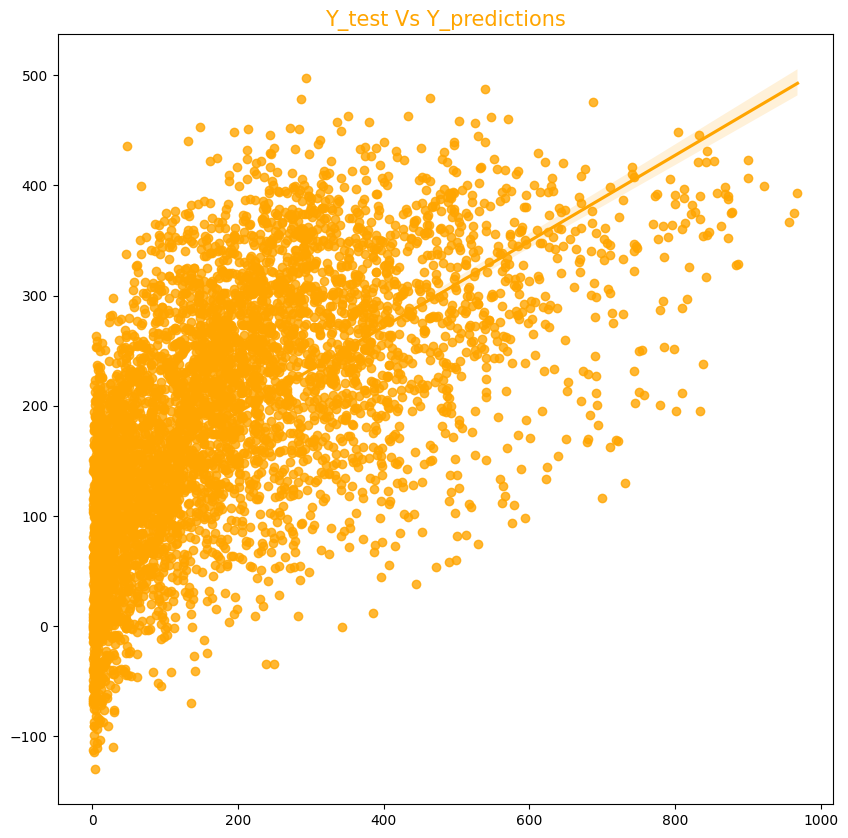

In [177]:
mean_squared_error_list = []
mean_absolute_error_list = []
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_cv)
mean_squared_error_list.append(mean_squared_error(y_predict, y_cv))
mean_absolute_error_list.append(mean_absolute_error(y_predict, y_cv))
print(f"The mean squared error of the linear regression model is {mean_squared_error_list[0]}")
print(f"The mean absolute error of the linear regression model is {mean_absolute_error_list[0]}")
plt.figure(figsize = (10, 10))
sns.regplot(x=y_cv, y=y_predict, color = 'orange')
plt.title("Y_test Vs Y_predictions", fontsize = 15, color = 'orange')
plt.show()

# 4. Conclusion

1. We could see that gradient boosting algorithm performance  in the cross-validation data was better than the other machine learning models used. Deep Neural Networks also performed well but gradient boosting tree was the best machine learning model for predicting the bike demand.
2. Scatterplots were used for the predictions and the actual test values to get the output respectively. 
3. Values were converted so that they lie between 0 and 1 respectively. 
4. Exploratory data analysis gives a good understanding of different features and how they influence the outcomes for different datasets and distributions. 